# Исследование продаж видеоигр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre — жанр игры`
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Откройте файл с данными и изучите общую информацию. 

**Задание 1. Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/games.csv`

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

**2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Задание 3. Выведим основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Заменим названия столбцов (приведём их к нижнему регистру);**

In [5]:
cols = {
    'Name': 'name', 
    'Platform': 'platform', 
    'Year_of_Release': 'year_of_release',
    'Genre': 'genre',
    'NA_sales': 'na_sales',
    'EU_sales': 'eu_sales',
    'JP_sales': 'jp_sales',
    'Other_sales': 'other_sales',
    'Critic_Score': 'critic_score',
    'User_Score': 'user_score',
    'Rating': 'rating'
}

data = data.rename(columns=cols)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Построим общую гистограмму для всех числовых столбцов таблицы.**

array([[<AxesSubplot:title={'center':'year_of_release'}>,
        <AxesSubplot:title={'center':'na_sales'}>],
       [<AxesSubplot:title={'center':'eu_sales'}>,
        <AxesSubplot:title={'center':'jp_sales'}>],
       [<AxesSubplot:title={'center':'other_sales'}>,
        <AxesSubplot:title={'center':'critic_score'}>]], dtype=object)

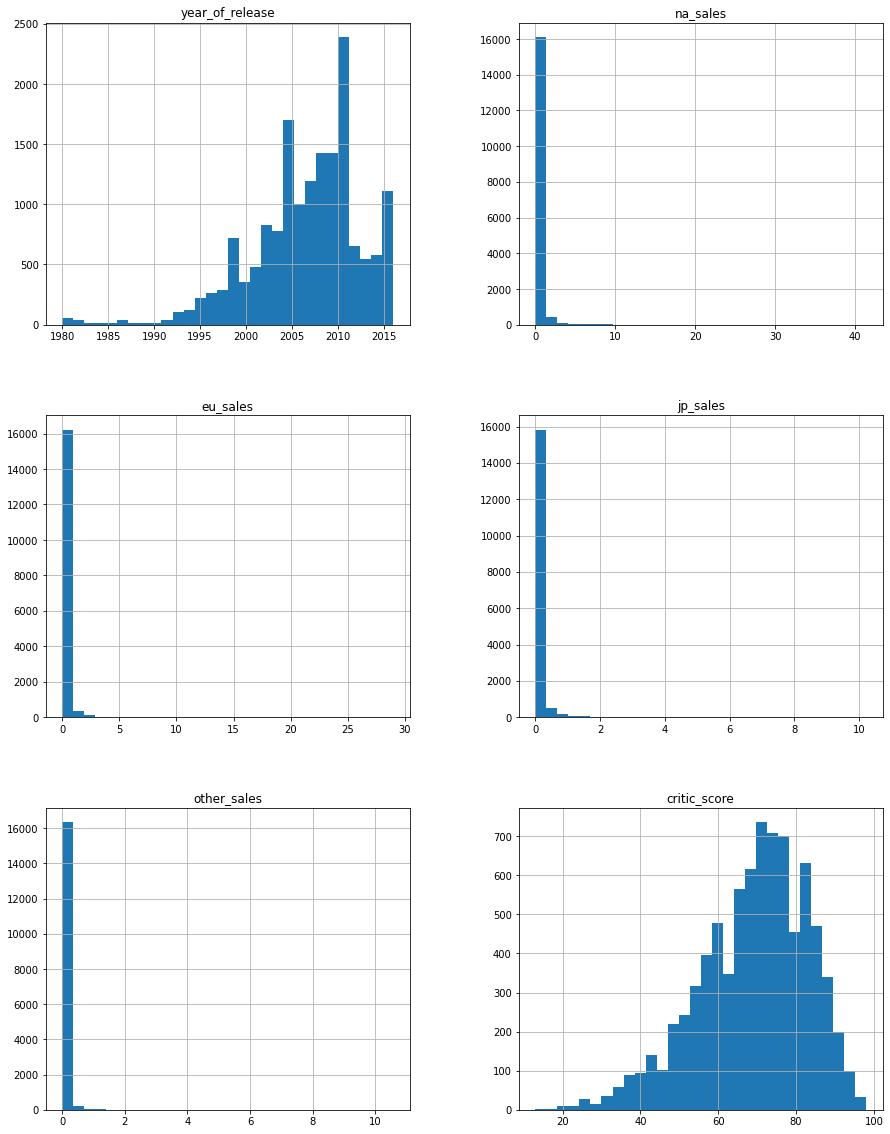

In [6]:
data.hist(bins=30, figsize=(15, 20))

Сохраним описание данных для лучшего понимания.

**Описание данных:**

- `name` — название игры
- `platform` — платформа
- `year_of_release` — год выпуска
- `genre` — жанр игры
- `na_sales` — продажи в Северной Америке (миллионы проданных копий)
- `eu_sales` — продажи в Европе (миллионы проданных копий)
- `jp_sales` — продажи в Японии (миллионы проданных копий)
- `other_sales` — продажи в других странах (миллионы проданных копий)
- `critic_score` — оценка критиков (максимум 100)
- `user_score` — оценка пользователей (максимум 10)
- `rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**Промежуточный вывод.** Все данные загружаются нормально. Основная информация выведена на экран. Общие гистограммы построены.

## Предобработка данных

### Удаление пропусков

**Задание 5. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [7]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Таким образом, нужно поробовать заполнить пропуски в 6 столбцах.

#### Удаление пропусков в `name` и `genre`

Посмотрим, что это за две игры без названий.

In [8]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Посмотрим, что это за две игры без жанров.

In [9]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Это одни и те же игры. Их нужно либо идентифицировать вручную, или удалить. Попробуем первое.

Это игры на платформе Sega Genesis за 1993 год. Посмотрим, какие ещё игры выходили с такими же данными.

In [10]:
data_GEN = data.loc[data['platform'] == 'GEN']
data_GEN = data_GEN[data_GEN['year_of_release'] == 1993.0]
data_GEN

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
data.loc[658, 'name']

'Monopoly'

In [12]:
data.loc[660, 'name']

'Guitar Hero'

Игры не расположены в алфавитном порядке.

Увы, претендентов на заполнение много, а данных - мало: 
https://www.igromania.ru/games/sega-genesis/all/1993/
Оставим здесь пропуски, к сожалению.

In [13]:
data.dropna(subset=['genre'], inplace=True)

#### Удаление пропусков в `year_of_release`

Посмотрим, для каких игр не указаны годы.

In [14]:
list_years = data.loc[data['year_of_release'].isna()]
list_years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Выведим названия всех игр без года выхода.

Выведем названия игр и платформ.

In [15]:
n = 1
for name, p in zip(list_years['name'], list_years['platform']):
    print(n, name, p)
    n+=1

1 Madden NFL 2004 PS2
2 FIFA Soccer 2004 PS2
3 LEGO Batman: The Videogame Wii
4 wwe Smackdown vs. Raw 2006 PS2
5 Space Invaders 2600
6 Rock Band X360
7 Frogger's Adventures: Temple of the Frog GBA
8 LEGO Indiana Jones: The Original Adventures Wii
9 Call of Duty 3 Wii
10 Rock Band Wii
11 Call of Duty: Black Ops PC
12 Rock Band PS3
13 Triple Play 99 PS
14 Adventure 2600
15 LEGO Batman: The Videogame PSP
16 Combat 2600
17 LEGO Harry Potter: Years 5-7 Wii
18 NASCAR Thunder 2003 PS2
19 Hitman 2: Silent Assassin XB
20 Rock Band PS2
21 Legacy of Kain: Soul Reaver PS
22 Donkey Kong Land III GB
23 Air-Sea Battle 2600
24 Suikoden III PS2
25 LEGO Harry Potter: Years 5-7 X360
26 Wheel of Fortune PS2
27 Yakuza 4 PS3
28 LEGO Harry Potter: Years 5-7 PS3
29 Namco Museum XB
30 Rhythm Heaven Wii
31 The Lord of the Rings: War in the North X360
32 Madden NFL 07 PSP
33 MLB SlugFest 20-03 PS2
34 The Lord of the Rings: War in the North PS3
35 Shaun White Snowboarding X360
36 PES 2009: Pro Evolution Soccer PS

Найдём даты релизов игр и составим словарь.

In [16]:
# создаём словарь релизов
relises_years = {
    'Madden NFL 2004': 2003,
    'FIFA Soccer 2004': 2003,
    'LEGO Batman: The Videogame': 2008,
    'wwe Smackdown vs. Raw 2006': 2008,
    'Space Invaders': 1978,
    'Rock Band': 2007,
    "Frogger's Adventures: Temple of the Frog": 2001,
    'LEGO Indiana Jones: The Original Adventures': 2008,
    'Call of Duty 3': 2006,
    'Call of Duty: Black Ops': 2010,
    'Triple Play 99': 1998,
    'Adventure': 1979,
    'Combat': 1977,
    'LEGO Harry Potter: Years 5-7': 2012,
    'NASCAR Thunder 2003': 2002,
    'Hitman 2: Silent Assassin': 2002,
    'Legacy of Kain: Soul Reaver': 1999,
    'Donkey Kong Land III': 1997,
    'Air-Sea Battle': 1977,
    'Suikoden III': 2002,
    'Wheel of Fortune': 1992,
    'Yakuza 4': 2010,
    'Namco Museum': 1995,
    'Rhythm Heaven': 2008,
    'The Lord of the Rings: War in the North': 2011,
    'Madden NFL 07': 2006,
    'MLB SlugFest 20-03': 2002,
    'Shaun White Snowboarding': 2008,
    'PES 2009: Pro Evolution Soccer': 2009,
    'WarioWare: Twisted!': 2004,
    'Madden NFL 11': 2010,
    'Test Drive Unlimited 2': 2011,
    'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe': 2005,
    'Monster Hunter 2': 2004,
    'Metal Gear Solid 2: Substance': 2001,
    'Advance Wars: Days of Ruin': 2008,
    'The Golden Compass': 2007 ,
    'Madden NFL 06': 2005,
    'NASCAR: Dirt to Daytona': 2002,
    'Madden NFL 2002': 2001,
    'Def Jam: Fight for NY': 2004,
    'NBA Street Vol. 2': 2003,
    'Fishing Derby': 1980,
    'Wet': 2009,
    'Sonic the Hedgehog': 1991,
    'Karate': 1984,
    'Tiger Woods PGA Tour 07': 2006,
    'Circus Atari': 1983,
    'The Chronicles of Riddick: Escape from Butcher Bay': 2004,
    "Maze Craze: A Game of Cops 'n Robbers": 1980,
    "Silent Hill: Homecoming": 2008,
    'Super Breakout': 1976,
    "Robert Ludlum's The Bourne Conspiracy": 2008,
    'NHL Slapshot': 2010,
    'TERA': 2011,
    'NFL GameDay 2003': 2002,
    'Harvest Moon: Save the Homeland': 2001,
    'Hangman': 1978,
    'NBA Live 2003': 1994,
    "Cubix Robots for Everyone: Clash 'n' Bash": 2002,
    'Dragon Ball Z: Budokai Tenkaichi 2 (JP sales)': 2002,
    'Tropico 4': 2011,
    'Tomb Raider (2013)': 2013,
    'Bejeweled 3': 2001,
    'Custom Robo': 1999,
    'Final Fantasy XI': 2002,
    'Singularity': 2010,
    'Dragster': 1980,
    'All-Star Baseball 2005': 2004,
    'Star Wars Jedi Knight II: Jedi Outcast': 2002,
    'Slot Machine': 1979,
    'The Dukes of Hazzard II: Daisy Dukes It Out': 2000,
    'Harvest Moon: The Tale of Two Towns': 2010,
    'Shrek the Third': 2007,
    'Nicktoons: Battle for Volcano Island': 2006,
    'Haven: Call of the King': 2002,
    'Unreal Championship 2: The Liandri Conflict': 2005,
    'Pac-Man Fever': 2002,
    'The Legend of Zelda: The Minish Cap(weekly JP sales)': 2004,
    'Indy 500': 1995,
    'Disgaea 3: Absence of Detention': 2008,
    'Flag Capture': 1978,
    'Gun': 2005,
    'Rock Revolution': 2008,
    'College Hoops 2K6': 2005,
    'Jonah Lomu Rugby Challenge': 1997,
    'Mega Man X Collection': 1993,
    'BioShock 2': 2010,
    'Danganronpa: Trigger Happy Havoc': 2010,
    'Jet X20': 2002,
    "Tony Hawk's Downhill Jam": 2006,
    'Tribes: Aerial Assault': 2002,
    'Big Beach Sports 2': 2008,
    'Yu Yu Hakusho: Dark Tournament': 2004,
    'Ghostbusters II': 1990,
    'Breakaway IV': 1978,
    'Robotech: Battlecry': 2002,
    'Move Fitness': 2011,
    'Valkyria Chronicles III: Unrecorded Chronicles': 2011,
    'DanceDanceRevolution II': 1998,
    'WRC: FIA World Rally Championship': 2001,
    'Famista 64': 1997,
    'Dead Space 3': 2013,
    'Pet Zombies': 2009,
    'Star Trek: Legacy': 2006,
    'Backbreaker': 2010,
    'Twisted Metal: Small Brawl': 2001,
    'Otomedius Excellent': 2011,
    'NBA Starting Five': 2002,
    'Teen Titans': 2006,
    'Trauma Team': 2010,
    "James Cameron's Dark Angel": 2002,
    'Sword of the Samurai': 1989,
    'Splatterhouse': 1988,
    'Alone in the Dark: The New Nightmare': 2001,
    'Vegas Party':  2009,
    'Jurassic Park: The Game': 2011,
    'Home Run': 1978,
    'eJay Clubworld': 2003,
    'Our House Party!': 2001,
    'WCW Backstage Assault': 2000,
    "Disney's Cinderella: Magical Dreams": 2005,
    'Transworld Surf': 2001,
    'Street Fighter IV': 2008,
    'Nintendo Puzzle Collection': 2003,
    'Charm Girls Club: My Fashion Mall': 2009,
    'Record of Agarest War Zero': 2009,
    'Rocksmith': 2011,
    'Super Robot Wars OG Saga: Masou Kishin II - Revelation of Evil God': 2012,
    'Saru! Get You! Million Monkeys': 2006,
    'Street Hoops': 2002,
    'Godzilla: Destroy All Monsters Melee': 2002,
    'The Daring Game for Girls': 2009,
    'Major League Baseball 2K6': 2006,
    'Star Trek: Conquest': 2007,
    'GiFTPiA': 2003,
    "Happy Feet Two": 2011,
    "Disney's Chicken Little: Ace In Action": 2006,
    'Atsumare! Power Pro Kun no DS Koushien': 2006,
    'My Healthy Cooking Coach': 2007,
    'Luminous Arc 2 (JP sales)': 2008,
    'Egg Monster Hero': 2010,
    'Demon Chaos': 2005,
    'Samurai Shodown Anthology': 2009,
    'Action Man-Operation Extreme': 2000,
    'Super Puzzle Fighter II': 1996,
    'Charm Girls Club: My Fashion Show': 2009,
    'Face Racers: Photo Finish': 2011,
    'Zero: Tsukihami no Kamen': 2008,
    'The Hidden': 2005,
    'Get Fit with Mel B': 2010,
    'Mega Man Battle Network: Operation Shooting Star': 2001,
    'Smashing Drive': 2000,
    'Port Royale 3': 2012,
    'Dream Trigger 3D': 2011,
    'Dead Island: Riptide': 2016,
    'Yoostar on MTV': 2011,
    "Tornado": 1993,
    "McFarlane's Evil Prophecy": 2004,
    'Drake of the 99 Dragons': 2003,
    'Build-A-Bear Workshop: Friendship Valley': 2007,
    'Rayman Arena': 2001,
    'National Geographic Challenge!': 2011,
    'Alex Rider: Stormbreaker': 2006,
    'Chou Soujuu Mecha MG': 2006,
    'Prinny: Can I Really Be The Hero? (US sales)': 2008,
    'Combat Elite: WWII Paratroopers': 2005,
    "Flip's Twisted World": 2010,
    'Mobile Ops: The One Year War': 2008,
    "Tom Clancy's Rainbow Six: Critical Hour": 2006,
    'Jewel Link Chronicles: Mountains of Madness': 2012,
    'Captain America: Super Soldier': 2011,
    'Mountain Bike Adrenaline': 2008,
    'Drill Dozer': 2005,
    'GRID': 2008,
    'Tour de France 2011': 2011,
    'Reader Rabbit 2nd Grade': 1983,
    'Monster Hunter Frontier Online': 2004,
    'RollerCoaster Tycoon': 1999,
    'Battle vs. Chess': 2011,
    'The History Channel: Great Battles - Medieval': 2009,
    'Clockwork Empires': 2016,
    'B.L.U.E.: Legend of Water': 1998,
    'NHL Hitz Pro': 2003,
    "Luxor: Pharaoh's Challenge": 2007,
    'Sega Rally 2006': 2006,
    'Half-Minute Hero 2': 2011,
    'Housekeeping': 2017,
    'Major League Baseball 2K8': 2008,
    'Sabre Wulf': 1984,
    'Swords': 2010,
    'Beyond the Labyrinth': 2012,
    'Bikkuriman Daijiten': 2007,
    'Majesty 2: The Fantasy Kingdom Sim': 2009,
    'Fullmetal Alchemist: Brotherhood': 2010,
    'Samurai Spirits: Tenkaichi Kenkakuden': 2005,
    'World of Tanks': 2010,
    'Tom and Jerry in War of the Whiskers': 2002,
    'Super Duper Sumos': 2002,
    'The King of Fighters: Maximum Impact - Maniax': 2004,
    'Combat Wings: The Great Battles of WWII': 2012,
    'Tube Slider': 2003,
    'Umineko no Naku Koro ni San: Shinjitsu to Gensou no Yasoukyoku': 2007,
    'Payout Poker & Casino': 2006,
    'Wii de Asobu: Metroid Prime': 2002,
    'Legacy of Ys: Books I & II': 2009,
    'Saint': 2009,
    'Steal Princess': 2008,
    'Mario Tennis': 1995,
    'Runaway: A Twist of Fate': 2009,
    "Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)": 2009,
    "Cabela's Alaskan Adventure": 2006,
    'Writing and Speaking Beautiful Japanese DS': 2009,
    'Virtua Quest': 2004,
    "Shonen Jump's Yu-Gi-Oh! GX Card Almanac": 2011,
    'Without Warning': 2005,
    'PDC World Championship Darts 2008': 2008,
    'Dinotopia: The Sunstone Odyssey': 2003,
    'Jet Impulse': 2007,
    'Dream Dancer': 2009,
    "Dance! It's Your Stage": 2010,
    'Football Manager 2007': 2006,
    'Ferrari: The Race Experience': 2010,
    'Aquaman: Battle for Atlantis': 2003,
    'Homeworld Remastered Collection': 2000,
    'Shorts': 2009,
    "AKB1/48: Idol to Guam de Koishitara...": 2011,
    'Brothers in Arms: Furious 4': 2015,
    'Agarest Senki: Re-appearance': 2008,
    'Freaky Flyers': 2003,
    'Inversion': 2012,
    "Hakuouki: Shinsengumi Kitan": 2008,
    'Virtua Quest': 2004
}

In [17]:
# функция для воссоздания year_of_release
def release_correction(row):
    year_of_release=row['year_of_release']
    name=row['name']

    if np.isnan(year_of_release) and name in relises_years:
        return relises_years[name]
    else:
        return year_of_release

new_release = data.apply(release_correction,axis=1)
data['year_of_release']=new_release

Проверим результат.

In [18]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Отлично! Все пропуски по годам заполнены.

#### Общие данные по оценкам

Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей.

In [19]:
data[data['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,2001.0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Это значение мы заменим на NaN.

In [20]:
# функция для воссоздания user_score
def user_score_correction(row):
    user_score=row['user_score']
    
    if user_score == 'tbd':
        return np.nan
    else:
        return user_score

new_user_score = data.apply(user_score_correction,axis=1)

data['user_score']=new_user_score

In [21]:
condition_1 = (data['critic_score'].isna()) & (~ data['user_score'].isna())
condition_2 = (~ data['critic_score'].isna()) & (data['user_score'].isna())
condition_3 =  (~ data['critic_score'].isna()) & (~ data['user_score'].isna())
condition_4 = (data['critic_score'].isna()) & (data['user_score'].isna())
print('Без оценок критиков, но с оценками пользователей ', condition_1.sum())
print('Без оценок пользователей, но с оценками критиков ', condition_2.sum())
print('С обеими оценками ', condition_3.sum())
print('Без оценок ', condition_4.sum())

Без оценок критиков, но с оценками пользователей  573
Без оценок пользователей, но с оценками критиков  1120
С обеими оценками  7017
Без оценок  8003


In [22]:
data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

In [23]:
# изменим тип данных
data['user_score'] = data['user_score'].astype(float)

In [24]:
data['user_score'].sort_values().unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

<AxesSubplot:xlabel='critic_score', ylabel='user_score'>

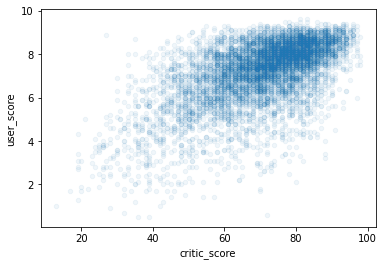

In [25]:
data.plot(x='critic_score', y='user_score', kind='scatter', alpha=0.0625)

In [26]:
corr = data['critic_score'].corr(data['user_score'])
print('Корреляция critic_score и user_score', corr)

Корреляция critic_score и user_score 0.5808778320767236


Есть достаточно выраженная взаимосвязь оценок. Ею можно воспользоваться.

In [27]:
# группируем и заменяем медианным значением
genre_data = data.dropna(subset=['genre'])
grouped_data = genre_data.groupby('genre')
critic_score_genre_median = grouped_data['critic_score'].agg('median')
critic_score_genre_median

genre
Action          68.0
Adventure       66.0
Fighting        72.0
Misc            69.0
Platform        69.0
Puzzle          70.0
Racing          69.0
Role-Playing    74.0
Shooter         73.0
Simulation      70.0
Sports          75.0
Strategy        73.0
Name: critic_score, dtype: float64

In [28]:
# группируем и заменяем медианным значением
genre_data = data.dropna(subset=['genre'])
grouped_data = genre_data.groupby('genre')
user_score_genre_median = grouped_data['user_score'].agg('median')
user_score_genre_median

genre
Action          7.4
Adventure       7.6
Fighting        7.6
Misc            7.1
Platform        7.7
Puzzle          7.5
Racing          7.4
Role-Playing    7.8
Shooter         7.4
Simulation      7.5
Sports          7.4
Strategy        7.8
Name: user_score, dtype: float64

In [29]:
platform_data = data.dropna(subset=['critic_score'])
grouped_data = platform_data.groupby('platform')
critic_score_platform_median = grouped_data['critic_score'].agg('median')
critic_score_platform_median

platform
3DS     68.0
DC      88.0
DS      66.0
GBA     69.0
GC      70.0
PC      78.0
PS      73.5
PS2     70.0
PS3     73.0
PS4     73.0
PSP     68.0
PSV     71.0
Wii     65.0
WiiU    73.5
X360    71.0
XB      72.0
XOne    76.0
Name: critic_score, dtype: float64

In [30]:
platform_data = data.dropna(subset=['user_score'])
grouped_data = platform_data.groupby('platform')
user_score_platform_median = grouped_data['user_score'].agg('median')
user_score_platform_median

platform
3DS     7.10
DC      8.80
DS      7.40
GBA     8.00
GC      7.95
PC      7.50
PS      8.30
PS2     8.00
PS3     7.10
PS4     7.00
PSP     7.50
PSV     7.60
Wii     7.15
WiiU    7.10
X360    7.00
XB      8.00
XOne    6.80
Name: user_score, dtype: float64

#### Удаление пропусков в `critic_score` и `user_score`

Попробуем восстановить оценки критиков и пользователей.

In [31]:
# функции для воссоздания critic_score и user_score
def critic_score_correction(row):
    critic_score=row['critic_score']
    user_score=row['user_score']
    genre=row['genre']
    platform=row['platform']

    # если есть оценка критика
    if not np.isnan(critic_score):
        return critic_score
    else:
        if np.isnan(user_score):
            if platform in critic_score_platform_median.unique():
                return (critic_score_genre_median.loc[genre] + critic_score_platform_median.loc[platform]) / 2
            else:
                return critic_score_genre_median.loc[genre]
        else:
            return int((user_score + user_score_genre_median.loc[genre] + user_score_platform_median.loc[platform])*10 /3)
    
def user_score_correction(row):
    critic_score=row['critic_score']
    user_score=row['user_score']
    genre=row['genre']
    platform=row['platform']

    if not np.isnan(user_score):
        return user_score
    else:
        if np.isnan(critic_score):
            if platform in user_score_platform_median.unique():
                return (user_score_genre_median.loc[genre] + user_score_platform_median.loc[platform]) / 2
            else:
                return user_score_genre_median.loc[genre]
        else:
            if platform in critic_score_platform_median.unique():
                return (critic_score + critic_score_genre_median.loc[genre] + critic_score_platform_median.loc[platform]) / 30.0
            else:
                return (critic_score + critic_score_genre_median.loc[genre]) / 20.0
            
new_critic_score = data.apply(critic_score_correction,axis=1)
data['critic_score']=new_critic_score

new_user_score = data.apply(user_score_correction,axis=1)
data['user_score']=new_user_score

<AxesSubplot:xlabel='critic_score', ylabel='user_score'>

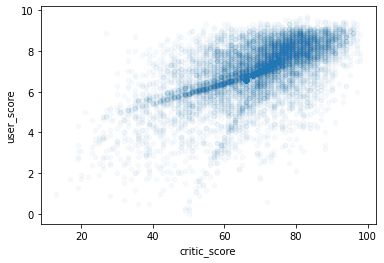

In [32]:
data.plot(x='critic_score', y='user_score', kind='scatter', alpha=0.03125)

In [33]:
corr = data['critic_score'].corr(data['user_score'])
print('Корреляция critic_score и user_score', corr)

Корреляция critic_score и user_score 0.6144824852980453


Значение корреляции не сильно изменилось, и значит, мы не исказили данные.

In [34]:
condition_1 = (data['critic_score'].isna()) & (~ data['user_score'].isna())
condition_2 = (~ data['critic_score'].isna()) & (data['user_score'].isna())
condition_3 =  (~ data['critic_score'].isna()) & (~ data['user_score'].isna())
condition_4 = (data['critic_score'].isna()) & (data['user_score'].isna())
print('Без оценок критиков, но с оценками пользователей ', condition_1.sum())
print('Без оценок пользователей, но с оценками критиков ', condition_2.sum())
print('С обеими оценками ', condition_3.sum())
print('Без оценок ', condition_4.sum())

Без оценок критиков, но с оценками пользователей  0
Без оценок пользователей, но с оценками критиков  0
С обеими оценками  16713
Без оценок  0


Все пропуски в рценках заполнены.

#### Удаление пропусков в `rating`

Разберёмся в пропусках возрастных рейтингов.

In [35]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

В столбце `rating` есть два значения, имеющие одинаковый смысл: `'K-A'` и `'E10+'` - это два значения Изначально `"K-A"` ("Kids to Adults"), потом было переименовано на E10+, поэтому переименуем 'K-A' в 'E10+' для удобного и более точного анализа в дальнейшем.

In [36]:
# Функция для замены значения 'K-A' на 'E10+'
def replace_wrong_ratings(wrong_ratings, correct_rating):
    data['rating'] = data['rating'].replace(wrong_ratings, correct_rating)

replace_wrong_ratings('K-A', 'E10+')
data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1423
EC         8
RP         3
AO         1
Name: rating, dtype: int64

Столбец `rating` содержит категориальные переменные, и поэтому мы не можем посчитать медиану или среднее. Однако сам возрастной рейтинг, по сути, можно выстроить по порядку в соответствии с его возрастом. Мы можем создать временную переменную `ratings_nums`, при помощи которой посчитаем нужные нам данные. После этого мы её удалим.

In [37]:
# функции для воссоздания rating по системе ESRB
def ratings_correction1(row):
    rating=row['rating']

    if rating == 'EC':
        return 0
    if rating == 'E':
        return 1
    if rating == 'E10+':
        return 2
    if rating == 'T':
        return 3
    if rating == 'M':
        return 4
    if rating == 'AO':
        return 5
    if rating == 'RP':
        return 6
    if np.isnan(rating):
        return rating

new_ratings = data.apply(ratings_correction1,axis=1)
data['ratings_nums']=new_ratings

Мы можем предположить, что ворастной рейтинг связан с жанром игры, т.к. от него во многом зависит её содержиние.

In [38]:
# группируем и заменяем медианным значением
genre_data = data.dropna(subset=['genre'])
grouped_data = genre_data.groupby('genre')
genre_median = grouped_data['ratings_nums'].agg('median')
genre_median

genre
Action          3.0
Adventure       2.0
Fighting        3.0
Misc            1.0
Platform        1.0
Puzzle          1.0
Racing          1.0
Role-Playing    3.0
Shooter         4.0
Simulation      1.0
Sports          1.0
Strategy        3.0
Name: ratings_nums, dtype: float64

Что ж, вполне логично, что шутеры по большей части имеют рейтинг 4.0, т.е. AO, т.к. в них много жестокости и насилия. Экшены и файтинги не такие натуралистичные и предназначены для акдтьлотт помоложе. Все прочие жанры вполне пригодны для детской и подростковой аудитории. Попробуем теперь заполнить пропуски в рейтингах по жанрам.

In [39]:
# функции для воссоздания rating по системе ESRB**
'''def ratings_correction2(row):
    rating=row['rating']
    genre=row['genre']
    if type(rating) == float:
        if genre == 'Action':
            return 'M'
        if genre == 'Adventure':
            return 'E10+'
        if genre == 'Fighting':
            return 'M'
        if genre == 'Misc':
            return 'E'
        if genre == 'Platform':
            return 'E'
        if genre == 'Puzzle':
            return 'E'
        if genre == 'Racing':
            return 'E'
        if genre == 'Role-Playing':
            return 'M'
        if genre == 'Shooter':
            return 'AO'
        if genre == 'Simulation':
            return 'E'
        if genre == 'Sports':
            return 'E'
        if genre == 'Strategy':
            return 'M'
    elif np.nan != rating:
        return rating
        
new_ratings = data.apply(ratings_correction2,axis=1)
data['rating']=new_ratings'''

"def ratings_correction2(row):\n    rating=row['rating']\n    genre=row['genre']\n    if type(rating) == float:\n        if genre == 'Action':\n            return 'M'\n        if genre == 'Adventure':\n            return 'E10+'\n        if genre == 'Fighting':\n            return 'M'\n        if genre == 'Misc':\n            return 'E'\n        if genre == 'Platform':\n            return 'E'\n        if genre == 'Puzzle':\n            return 'E'\n        if genre == 'Racing':\n            return 'E'\n        if genre == 'Role-Playing':\n            return 'M'\n        if genre == 'Shooter':\n            return 'AO'\n        if genre == 'Simulation':\n            return 'E'\n        if genre == 'Sports':\n            return 'E'\n        if genre == 'Strategy':\n            return 'M'\n    elif np.nan != rating:\n        return rating\n        \nnew_ratings = data.apply(ratings_correction2,axis=1)\ndata['rating']=new_ratings"

Закомментим лишнюю команду и добавим нужную.

In [40]:
# заполним пропуски в категрии 'rating' на 'No rating'
data['rating'] = data['rating'].fillna('No rating')

Удалим теперь столбец `ratings_nums`

In [41]:
# удаление временного столбца ratings_nums
data = data.drop('ratings_nums', axis=1)

#### Удаление пропусков - проверка результатов

Проверим, как много пропусков мы заполнили.

In [42]:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Да, мы заполнили всё, что было в наших силах.

**Промежуточный вывод.** Работа с пропусками в данных позволяет восполнить значительную часть пробнлов.

### Изменение типов данных

Для начала посмотрим на текущие типы данных.

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Как можно видеть, некоторые типы данных следует изменить.

#### Изменим данные в `year_of_release`

Год релиза лучше измерять в целых числах. Изменим данные в `year_of_release` на `int`.

In [44]:
data['year_of_release'] = data['year_of_release'].astype(int)

Идём дальше.

#### Изменим данные в `platform`

Изменим в наименованиях в `platform`, чтобы было ясно, о каких именно игровых платформах идет речь.

In [45]:
# Функция для замены значения аббревиатур на полное название бля понимание, что это за игровая платформа.
def replace_wrong_platforms(wrong_platforms, correct_platform):
    data['platform'] = data['platform'].replace(wrong_platforms, correct_platform)

replace_wrong_platforms('2600', 'Atari 2600')
replace_wrong_platforms('3DO', 'Panasonic 3DO')
replace_wrong_platforms('3DS', 'Nintendo 3DS')
replace_wrong_platforms('GC', 'Nintendo GameCube')
replace_wrong_platforms('GEN', 'SEGA Retro Genesis')
replace_wrong_platforms('GG', 'Game Gear')
replace_wrong_platforms('GB', 'GB-60')
replace_wrong_platforms('PCFX', 'NEC PC-FX')
replace_wrong_platforms('NES', 'Nintendo NES')
replace_wrong_platforms('DS', 'Nintendo DS')
replace_wrong_platforms('SNES', 'Nintendo SNES')
replace_wrong_platforms('GBA', 'Game Boy Advance')
replace_wrong_platforms('N64', 'Nintendo 64')
replace_wrong_platforms('WiiU', 'Nintendo Wii U')
replace_wrong_platforms('DC', 'Dendy Classic')
replace_wrong_platforms('PSV', 'PS Vita')
replace_wrong_platforms('SAT', 'Sega Saturn')
replace_wrong_platforms('WS', 'WonderSwan')
replace_wrong_platforms('Wii', 'Nintendo Wii')
replace_wrong_platforms('TG16', 'NEC TurboGrafx')
replace_wrong_platforms('XB', 'Xbox')
replace_wrong_platforms('XOne', 'Xbox One')
replace_wrong_platforms('X360', 'Xbox 360')

Сокращение для PS и так приычно. Проверяем уникальные значения в столбце.

In [46]:
display(data['platform'].unique())

array(['Nintendo Wii', 'Nintendo NES', 'GB-60', 'Nintendo DS', 'Xbox 360',
       'PS3', 'PS2', 'Nintendo SNES', 'Game Boy Advance', 'PS4',
       'Nintendo 3DS', 'Nintendo 64', 'PS', 'Xbox', 'PC', 'Atari 2600',
       'PSP', 'Xbox One', 'Nintendo Wii U', 'Nintendo GameCube',
       'SEGA Retro Genesis', 'Dendy Classic', 'PS Vita', 'Sega Saturn',
       'SCD', 'WonderSwan', 'NG', 'NEC TurboGrafx', 'Panasonic 3DO',
       'Game Gear', 'NEC PC-FX'], dtype=object)

#### Изменим данные в `user_score`

Этот тип данных был изменён ранее, на этапе заполнения пропусков.

#### Изменим данные в `critic_score` 

Данные об оценках критиков лучше сделать целыми числами.

In [47]:
data['critic_score'] = data['critic_score'].astype(int)

Данные о продажах менять не нужно.

Проверим результаты.

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


**Промежуточный вывод.** Изменение некоторых типов данных с вещественных на целые облегчит понимание, анализ и интерпретацию данных.

### Обработка дубликатов

Проверим, имеются ли в данных дубликаты.

In [49]:
data.duplicated().sum()

0

Слава богу, нет. Идём дальше.

### Обработка редких значений и аномалий

#### Поиск аномалий в `year_of_release`

In [50]:
# посмотрим диапазон значений в year_of_release
print(data['year_of_release'].describe())
data['year_of_release'].unique()

count    16713.000000
mean      2006.449590
std          5.924357
min       1976.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2017.000000
Name: year_of_release, dtype: float64


array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983, 1978, 1979, 1977, 1976, 2017])

Аномалий нет.

#### Поиск аномалий в `genre`

In [51]:
# посмотрим диапазон значений в genre
print(data['genre'].describe())
data['genre'].unique()

count      16713
unique        12
top       Action
freq        3369
Name: genre, dtype: object


array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Аномалий нет.

#### Поиск аномалий в `platform`

In [52]:
# посмотрим диапазон значений в platform
print(data['platform'].describe())
data['platform'].unique()

count     16713
unique       31
top         PS2
freq       2161
Name: platform, dtype: object


array(['Nintendo Wii', 'Nintendo NES', 'GB-60', 'Nintendo DS', 'Xbox 360',
       'PS3', 'PS2', 'Nintendo SNES', 'Game Boy Advance', 'PS4',
       'Nintendo 3DS', 'Nintendo 64', 'PS', 'Xbox', 'PC', 'Atari 2600',
       'PSP', 'Xbox One', 'Nintendo Wii U', 'Nintendo GameCube',
       'SEGA Retro Genesis', 'Dendy Classic', 'PS Vita', 'Sega Saturn',
       'SCD', 'WonderSwan', 'NG', 'NEC TurboGrafx', 'Panasonic 3DO',
       'Game Gear', 'NEC PC-FX'], dtype=object)

Можно было бы объединить различные модели Nintendo, Game Boy или PlayStation, но это может исказить результаты, т.к. нас будут интересовать платформы, а не фирмы, их производящие.

#### Поиск аномалий в `na_sales`, `eu_sales`, `jp_sales`, `other_sales`

In [53]:
for c in ['na_sales', 'eu_sales', 'jp_sales','other_sales']:
    print('==================', c, '==================')
    print(data[c].describe())
    data[c].unique()

================== na_sales ==================
count    16713.000000
mean         0.263302
std          0.813565
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64
================== eu_sales ==================
count    16713.000000
mean         0.145045
std          0.503359
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64
================== jp_sales ==================
count    16713.000000
mean         0.077625
std          0.308871
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64
================== other_sales ==================
count    16713.000000
mean         0.047343
std          0.186742
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_

Аномалий нет.

#### Поиск аномалий в `critic_score`

In [54]:
# посмотрим диапазон значений в critic_score
print(data['critic_score'].describe())
data['critic_score'].unique()

count    16713.000000
mean        69.665649
std         10.037840
min         13.000000
25%         66.000000
50%         70.000000
75%         75.000000
max         98.000000
Name: critic_score, dtype: float64


array([76, 69, 82, 80, 74, 70, 89, 58, 87, 73, 91, 61, 97, 95, 77, 88, 83,
       94, 93, 85, 86, 68, 66, 98, 96, 90, 84, 78, 92, 71, 72, 62, 75, 49,
       67, 81, 56, 64, 63, 79, 59, 60, 50, 25, 42, 44, 55, 48, 57, 29, 47,
       65, 54, 20, 53, 37, 38, 33, 52, 30, 32, 43, 45, 51, 40, 46, 39, 34,
       35, 41, 36, 28, 31, 27, 26, 19, 23, 24, 21, 17, 22, 13])

Аномалий нет.

#### Поиск аномалий в `user_score`

In [55]:
# посмотрим диапазон значений в user_score
print(data['user_score'].describe())
data['user_score'].unique()

count    16713.000000
mean         7.043011
std          1.050813
min          0.000000
25%          6.800000
50%          7.000000
75%          7.500000
max          9.700000
Name: user_score, dtype: float64


array([8.  , 6.9 , 8.3 , 7.4 , 7.  , 8.5 , 6.6 , 8.4 , 7.3 , 8.6 , 7.7 ,
       6.3 , 8.2 , 9.  , 7.9 , 8.1 , 8.7 , 7.1 , 3.4 , 5.3 , 4.8 , 3.2 ,
       8.9 , 6.4 , 7.8 , 6.8 , 7.5 , 2.6 , 7.2 , 9.2 , 4.3 , 7.6 , 5.7 ,
       5.  , 9.1 , 6.5 , 8.8 , 9.4 , 6.1 , 6.7 , 5.4 , 7.65, 4.  , 4.9 ,
       4.5 , 9.3 , 6.2 , 4.2 , 6.  , 3.7 , 4.1 , 5.8 , 5.6 , 5.5 , 4.4 ,
       4.6 , 5.9 , 7.85, 3.9 , 7.45, 3.1 , 6.95, 2.9 , 5.2 , 6.15, 3.3 ,
       4.7 , 5.1 , 3.5 , 2.5 , 6.75, 1.9 , 6.65, 5.35, 3.  , 7.25, 2.7 ,
       2.2 , 6.55, 2.  , 9.5 , 6.35, 5.95, 7.75, 2.1 , 5.65, 5.55, 3.6 ,
       7.05, 2.8 , 8.05, 6.85, 7.15, 1.8 , 7.35, 3.8 , 0.  , 8.25, 1.6 ,
       7.55, 9.6 , 5.75, 6.05, 5.85, 2.4 , 1.7 , 1.1 , 6.45, 6.25, 0.3 ,
       4.75, 1.5 , 0.7 , 1.2 , 7.95, 2.3 , 0.5 , 8.15, 5.45, 1.3 , 5.05,
       0.2 , 0.6 , 1.4 , 0.9 , 1.  , 5.15, 5.25, 9.7 , 4.95])

Аномалий нет.

#### Поиск аномалий в `rating`

In [56]:
# посмотрим диапазон значений в rating
print(data['rating'].describe())
data['rating'].unique()

count         16713
unique            8
top       No rating
freq           6764
Name: rating, dtype: object


array(['E', 'No rating', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Аномалий нет.

**Вывод.** Аномалий нет, но если бы были, то мы их уберём.

### Посчитайте и добавьте в таблицу новые столбцы

**Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.**

In [57]:
# data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16713, dtype: float64

Проверим, добавились ли данные.

In [58]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Nintendo Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,Nintendo NES,1985,Platform,29.08,3.58,6.81,0.77,69,6.9,No rating,40.24
2,Mario Kart Wii,Nintendo Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Nintendo Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB-60,1996,Role-Playing,11.27,8.89,10.22,1.00,74,7.4,No rating,31.38
5,Tetris,GB-60,1989,Puzzle,23.20,2.26,4.22,0.58,70,7.0,No rating,30.26
6,New Super Mario Bros.,Nintendo DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Nintendo Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Nintendo Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,Nintendo NES,1984,Shooter,26.93,0.63,0.28,0.47,73,7.3,No rating,28.31


Да, всё нормально.

**Промежуточный вывод.** Добавление новых столбцов позволяет категоризировать данные и расширить их потенциал. Это помогает улучшить анализ.

## Проведите исследовательский анализ данных

#### Год выпуска

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [59]:
# группировка
count_games_year_of_release = data.groupby(['year_of_release'])['name'].count()
count_games_year_of_release

year_of_release
1976       1
1977       2
1978       5
1979       2
1980      12
1981      46
1982      36
1983      19
1984      16
1985      14
1986      21
1987      16
1988      16
1989      18
1990      17
1991      42
1992      44
1993      62
1994     123
1995     222
1996     264
1997     292
1998     382
1999     341
2000     355
2001     498
2002     851
2003     787
2004     775
2005     953
2006    1024
2007    1211
2008    1456
2009    1445
2010    1275
2011    1164
2012     667
2013     546
2014     581
2015     607
2016     504
2017       1
Name: name, dtype: int64

Text(0, 0.5, 'Количество прдаж, млг. копий')

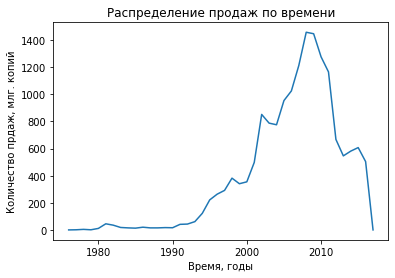

In [60]:
count_games_year_of_release.plot()
plt.title("Распределение продаж по времени")
plt.xlabel("Время, годы")
plt.ylabel("Количество прдаж, млг. копий")

Самый пик продаж видеоигр пришёлся на 2008-2009 гг. Экономический кризис подкосил индустрию, видимо.

#### Продажи по платформам

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [61]:
# первая выгрузка
count_games = data.groupby(['platform', 'year_of_release'])['name'].count()
count_games

platform    year_of_release
Atari 2600  1976                1
            1977                2
            1978                5
            1979                2
            1980               12
                               ..
Xbox 360    2016               13
Xbox One    2013               19
            2014               61
            2015               80
            2016               87
Name: name, Length: 271, dtype: int64

Теперь посчитаем сколько игр вышло в разные года по всем платформам.

Text(0, 0.5, 'Количество прдаж, млг. копий')

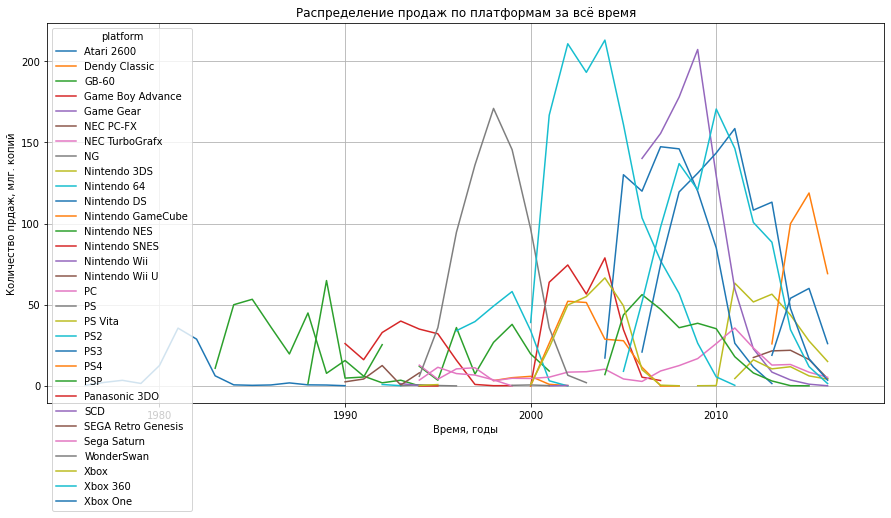

In [62]:
# построим график распределения по годам
current_data = data.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
current_data.plot(grid=True, figsize=(15, 7))
plt.title("Распределение продаж по платформам за всё время")
plt.xlabel("Время, годы")
plt.ylabel("Количество прдаж, млг. копий")

####  Характерный срок жизни платформ

Посмотрим, как распределены по времени платформы.

Text(-81.2, 0.5, 'Платформы')

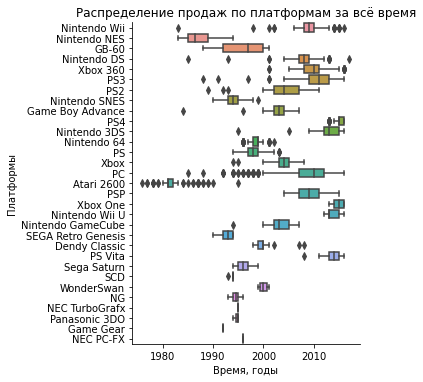

In [63]:
# выводим диаграмму размаха общего плана
sns.catplot(x='year_of_release', y='platform', kind='box', data=data)
plt.title("Распределение продаж по платформам за всё время")
plt.xlabel("Время, годы")
plt.ylabel("Платформы")

In [64]:
time_data = data.groupby('platform')['year_of_release'].describe()

In [65]:
# продолжительност "жизни" платформ
time_data['life'] = time_data['max'] - time_data['min']
time_data

,count,mean,std,min,25%,50%,75%,max,life
platform,,,,,,,,,
Atari 2600,133.0,1981.939850,2.598832,1976.0,1981.00,1981.0,1982.00,1995.0,19.0
Dendy Classic,52.0,1999.942308,1.808623,1998.0,1999.00,2000.0,2000.00,2008.0,10.0
GB-60,98.0,1995.969388,4.157850,1988.0,1992.00,1997.0,2000.00,2001.0,13.0
Game Boy Advance,822.0,2003.184915,1.639900,1984.0,2002.00,2003.0,2004.00,2007.0,23.0
Game Gear,1.0,1992.000000,NaN,1992.0,1992.00,1992.0,1992.00,1992.0,0.0
NEC PC-FX,1.0,1996.000000,NaN,1996.0,1996.00,1996.0,1996.00,1996.0,0.0
NEC TurboGrafx,2.0,1995.000000,0.000000,1995.0,1995.00,1995.0,1995.00,1995.0,0.0
NG,12.0,1994.500000,1.000000,1993.0,1994.00,1994.5,1995.00,1996.0,3.0
Nintendo 3DS,520.0,2013.050000,1.870932,1995.0,2012.00,2013.0,2015.00,2016.0,21.0


Text(0, 0.5, 'Количество новых моделей платформ.')

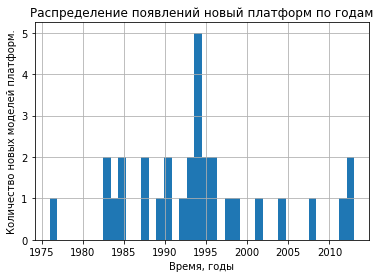

In [66]:
# как часто появляются новые платформы
time_data['min'].hist(bins=40)
plt.title("Распределение появлений новый платформ по годам")
plt.xlabel("Время, годы")
plt.ylabel("Количество новых моделей платформ.")

Новые модели, если не брать в расчет PS2, появлялись с регулярностью раз в 1-3 года, кроме двух последних платформ, которые появились одновременно. Наибольшее почичество новых платформ пришлиось на середину 1990-х гг.

Text(0, 0.5, 'Количество исчезнувших моделей платформ.')

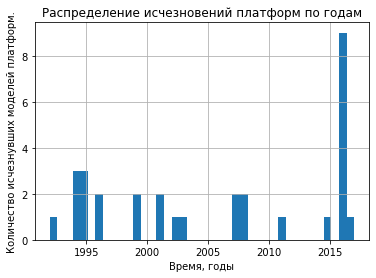

In [67]:
# как часто платформы исчезают
time_data['max'].hist(bins=40)
plt.title("Распределение исчезновений платформ по годам")
plt.xlabel("Время, годы")
plt.ylabel("Количество исчезнувших моделей платформ.")

Text(0, 0.5, 'Количество платформ')

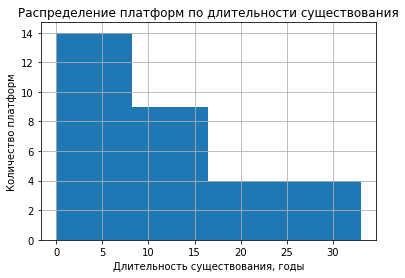

In [68]:
time_data['life'].hist(bins=4)
plt.title("Распределение платформ по длительности существования")
plt.xlabel("Длительность существования, годы")
plt.ylabel("Количество платформ")

Text(0, 0.5, 'Количество платформ')

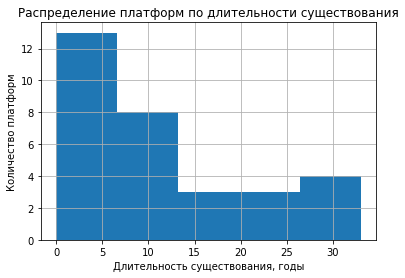

In [69]:
time_data['life'].hist(bins=5)
plt.title("Распределение платформ по длительности существования")
plt.xlabel("Длительность существования, годы")
plt.ylabel("Количество платформ")

Text(0, 0.5, 'Количество платформ')

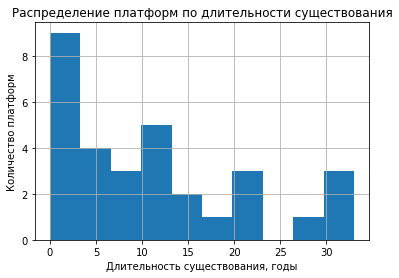

In [70]:
time_data['life'].hist(bins=10)
plt.title("Распределение платформ по длительности существования")
plt.xlabel("Длительность существования, годы")
plt.ylabel("Количество платформ")

К сожалению, большинство платформ существуют на рынке менее 10-20 лет. Редкие счастливчики вррде Atari, Nintendo, PlayStatiom и Game Boy держатся достаточно долго. Также отличаются долголетием непотопляемык ПК-бояре.

**Предварительные выводы:**
Новые модели, если не брать в расчет PS2, появлялись с регулярностью раз в 1-3 года, кроме двух последних платформ, которые появились одновременно. Наибольшее почичество новых платформ пришлиось на середину 1990-х гг.
К сожалению, большинство платформ существуют на рынке менее 10-20 лет. Редкие счастливчики вррде Atari, Nintendo, PlayStatiom и Game Boy держатся достаточно долго. Также отличаются долголетием непотопляемык ПК-бояре.
Исчезновение старых моделей так же было постепенно, относительно их появления, за исключением платформ Nintendo. Хоть они и появились в разные периоды, но эпоха Nintendo закончила в один год.

#### Актуальный период

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Актуальные период для прогноза на 2017 определим как 2015-2016 гг. Данный период выбран, чтобы мы могли посмотреть какие платформы в принципе не будут продаваться. Если сделать период меньше, то часть данных будет урезана.

Text(0.5, 1.0, 'Распределение продаж по платформам за 2015-2016 гг.')

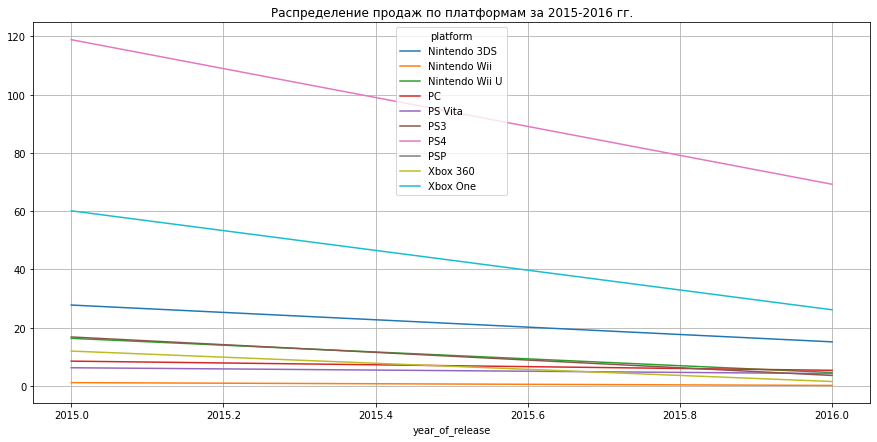

In [71]:
# оставим в выгрузке только последние два года
current_data = data.query("2015 <= year_of_release <= 2016")
# построим график распределения по годам
current_data_pivot_table = current_data.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
current_data_pivot_table.plot(grid=True, figsize=(15, 7))
plt.title("Распределение продаж по платформам за 2015-2016 гг.")

In [72]:
current_data_pivot_table

platform,Nintendo 3DS,Nintendo Wii,Nintendo Wii U,PC,PS Vita,PS3,PS4,PSP,Xbox 360,Xbox One
year_of_release,,,,,,,,,,
2015,27.78,1.14,16.35,8.52,6.25,16.82,118.90,0.12,11.97,60.14
2016,15.14,0.18,4.60,5.37,4.25,3.60,69.25,NaN,1.52,26.15


Если отталкивать от данного графика, то можно сделать **выводы**:
- потенциально прибыльными платформами являются PS4 и Xbox One. Именно они дольше всего "на плаву". 
- Nintendo 3DS так же имеет хорошие продажи (более 20 млн.), но значительно меньшие.

#### Без данных за предыдущие годы

Не учитывайте в работе данные за предыдущие годы.

Text(0.5, 1.0, 'Распределение продаж по платформам за 2015-2016 гг.')

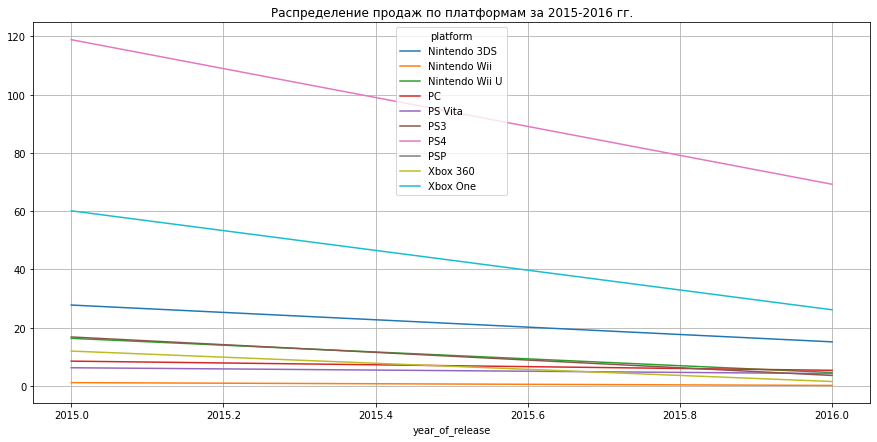

In [73]:
# оставим в выгрузке только последние два года
current_data = data.query("2015 <= year_of_release <= 2016")
# построим график распределения по годам
current_data_pivot_table = current_data.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
current_data_pivot_table.plot(grid=True, figsize=(15, 7))
plt.title("Распределение продаж по платформам за 2015-2016 гг.")

#### Лидеры продаж среди платформ

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

На графике мы можем заметить, что продажи в течении года стремительно уменьшались и из всех платформ в выборке остались только две, по которым показатели значительно высокие. Это платформы `Xbox One` и `PS4`. По остальным платформам показатель близится к 0.
Далее выведем таблицу с подсчетом общих продаж.

In [74]:
# суммируем столбцы продаж и добавим результат в столбец sum_sales_game
current_data.groupby(['platform'])['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales'].sum()

,na_sales,eu_sales,jp_sales,other_sales,total_sales
platform,,,,,
Nintendo 3DS,10.31,7.39,23.55,1.67,42.92
Nintendo Wii,0.49,0.73,0.00,0.10,1.32
Nintendo Wii U,8.86,6.49,4.12,1.48,20.95
PC,3.72,9.21,0.00,0.96,13.89
PS Vita,0.54,1.08,8.41,0.47,10.50
PS3,5.66,7.30,4.97,2.49,20.42
PS4,63.86,83.54,12.05,28.70,188.15
PSP,0.00,0.00,0.12,0.00,0.12
Xbox 360,8.06,4.21,0.00,1.22,13.49


Из данной мы можем выделить две игровые платформы с наибольшими суммарными продажами. Выделим от 50 млн продаж - это платформы: Xbox One и PS4. Таким образом, мы отсеиваем мало продаваемые и устаревшие позиции.

In [75]:
# обновим выгрузку и оставим только интересующие нас платформы
leaders = current_data.query("platform == ['Xbox One', 'PS4']")
leaders

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73,7.3,No rating,14.63
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,73,7.3,No rating,7.98
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
99,Call of Duty: Black Ops 3,Xbox One,2015,Shooter,4.59,2.11,0.01,0.68,73,7.3,No rating,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,Xbox One,2016,Racing,0.00,0.01,0.00,0.00,63,8.2,E,0.01
16643,Rugby Challenge 3,Xbox One,2016,Sports,0.00,0.01,0.00,0.00,69,6.6,E,0.01
16645,ZombiU,Xbox One,2016,Action,0.00,0.01,0.00,0.00,68,6.8,No rating,0.01
16660,Prison Architect,Xbox One,2016,Action,0.01,0.00,0.00,0.00,74,6.7,No rating,0.01


На графике выше мы видим самые продаваемые позиции за период с 2015 по 2016 года. Обратим внимание, что продажи всех платформ, кроме Xbox One и PS4, к 2016 году приближены к 0.

#### Глобальные продажи игр и 'ящик с усами'

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [76]:
data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
Atari 2600,133.0,0.729173,0.917799,0.07,0.3000,0.460,0.7800,7.81
Dendy Classic,52.0,0.306731,0.468660,0.02,0.0775,0.135,0.2975,2.41
GB-60,98.0,2.606735,5.365478,0.06,0.3025,1.165,2.1650,31.38
Game Boy Advance,822.0,0.386679,0.896897,0.01,0.0525,0.160,0.3900,15.84
Game Gear,1.0,0.040000,NaN,0.04,0.0400,0.040,0.0400,0.04
NEC PC-FX,1.0,0.030000,NaN,0.03,0.0300,0.030,0.0300,0.03
NEC TurboGrafx,2.0,0.080000,0.084853,0.02,0.0500,0.080,0.1100,0.14
NG,12.0,0.120000,0.082241,0.02,0.0550,0.100,0.2000,0.25
Nintendo 3DS,520.0,0.498077,1.430876,0.01,0.0500,0.120,0.3300,14.60


По всем данным за весь период лидирцют модели платформ PS, Xbox и немного Nintendo.

В данном обсуждении мы будем отталкиваться от актуального периода (2015-2016 года).
Если отталкивать от нашего графика, то можно сделать следующий вывод - потенциально прибыльной платформой можно считать PS4 и Xbox One. Именно эта платформа дольше всего "на плаву". Xbox One так же имеет продажи, но значительно меньше, но это тоже значимо.

In [77]:
current_data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
Nintendo 3DS,132.0,0.325152,0.798620,0.01,0.030,0.090,0.2325,7.14
Nintendo Wii,5.0,0.264000,0.390487,0.01,0.030,0.150,0.1800,0.95
Nintendo Wii U,42.0,0.498810,0.850240,0.01,0.050,0.215,0.5175,4.44
PC,106.0,0.131038,0.207699,0.01,0.020,0.050,0.1400,1.28
PS Vita,195.0,0.053846,0.063669,0.01,0.020,0.030,0.0600,0.41
PS3,111.0,0.183964,0.342696,0.01,0.020,0.060,0.1600,2.70
PS4,301.0,0.625083,1.457063,0.01,0.050,0.120,0.4200,14.63
PSP,3.0,0.040000,0.034641,0.02,0.020,0.020,0.0500,0.08
Xbox 360,49.0,0.275306,0.379194,0.01,0.040,0.100,0.3500,1.70


По всем данным за 2015-2016 гг. также лидирцют модели платформ PS, Xbox и немного Nintendo и PC.

In [78]:
leaders.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,301.0,0.625083,1.457063,0.01,0.050,0.12,0.420,14.63
Xbox One,167.0,0.516707,0.965940,0.01,0.035,0.13,0.555,7.39


Визуализируем эту таблицу для наглядности.

Text(0.5, 1.0, 'Распределение продаж по платформам за 2015-2016 гг.')

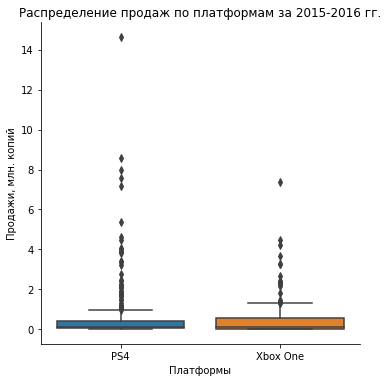

In [79]:
# построим общую диаграмму размаха
sns.catplot(y='total_sales', x='platform', kind='box', data=leaders)
plt.xlabel("Платформы")
plt.ylabel("Продажи, млн. копий")
plt.title("Распределение продаж по платформам за 2015-2016 гг.")

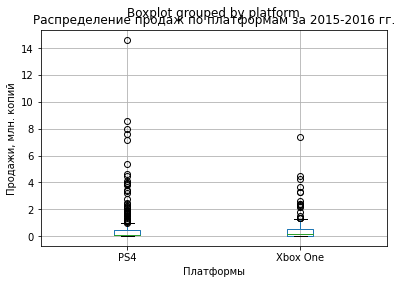

In [80]:
# построим общую диаграмму размаха
leaders.boxplot(column='total_sales',by='platform')
plt.title("Распределение продаж по платформам за 2015-2016 гг.")
plt.xlabel("Платформы")
plt.ylabel("Продажи, млн. копий")
plt.show()

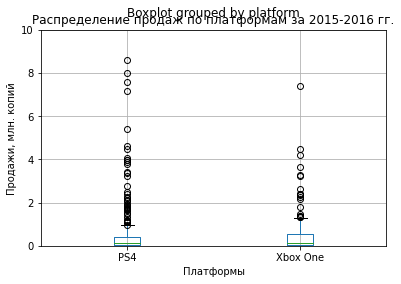

In [81]:
# построим общую диаграмму размаха
leaders.boxplot(column='total_sales',by='platform')
plt.title("Распределение продаж по платформам за 2015-2016 гг.")
plt.xlabel("Платформы")
plt.ylabel("Продажи, млн. копий")
plt.ylim(0, 10)
plt.show()

Просмотрев общую диаграмму размаха мы видели частые выбросы и редкие. Данные выбросы предлагаю оставить, т.к. есть игры, которые могли "выстрелить" большими продажами.

Text(0.5, 6.79999999999999, 'Продажи, млн. копий')

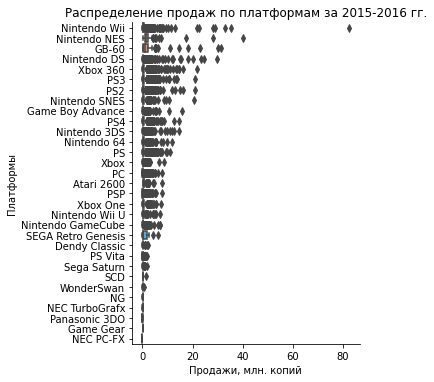

In [82]:
# выводим диаграмму размаха общего плана
sns.catplot(x='total_sales', y='platform', kind='box', data=data)
plt.title("Распределение продаж по платформам за 2015-2016 гг.")
plt.ylabel("Платформы")
plt.xlabel("Продажи, млн. копий")

В представленной диаграмме мы видим, что есть очень редкие выбросы с продажами в 80 млн (видимо эта игра была очень популярная игра), так же редкие, в отличии от других, выбросы есть в диапазоне от 20 до 40 млн. Уберем эти выбросы и еще раз посмотрим на диаграмму размаха.

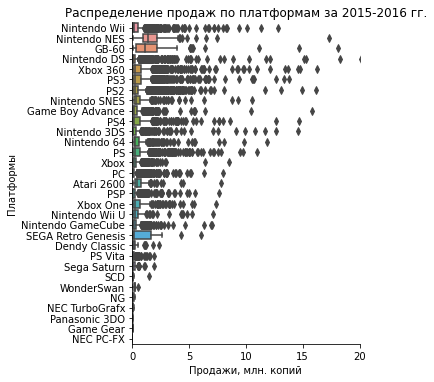

In [83]:
# теперь сужаем диапазон до 20 млн продаж
# подгоняем данные по стороне 'Y'
g = sns.catplot(x='total_sales', y='platform', kind='box', data=data)
plt.title("Распределение продаж по платформам за 2015-2016 гг.")
plt.ylabel("Платформы")
plt.xlabel("Продажи, млн. копий")
g.set(xlim=(0, 20))

На этом графике у всех позиций есть редкие выбросы. Это нам не нужно. Если и оставлять выбросы, то они должны быть максимально частыми, которые будут полезны статистике. Мы уже близки к нашей финальной визуализации.

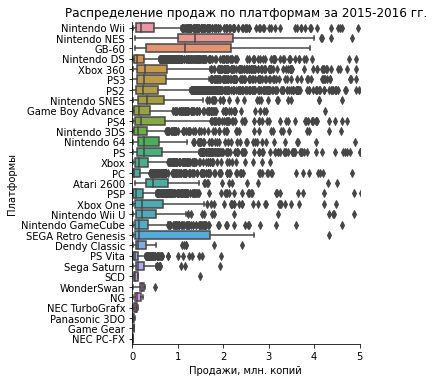

In [84]:
g = sns.catplot(x='total_sales', y='platform', kind='box', data=data)
plt.title("Распределение продаж по платформам за 2015-2016 гг.")
plt.ylabel("Платформы")
plt.xlabel("Продажи, млн. копий")
g.set(xlim=(0, 5))

Сузим сузить диапазон до 3.9 млн.

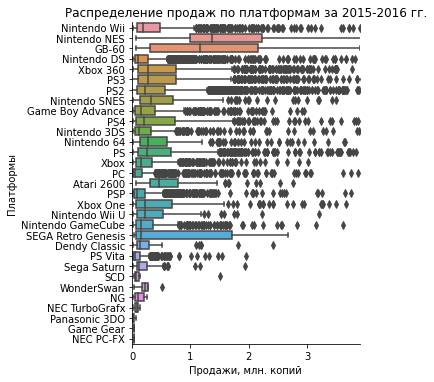

In [85]:
g = sns.catplot(x='total_sales', y='platform', kind='box', data=data)
plt.title("Распределение продаж по платформам за 2015-2016 гг.")
plt.ylabel("Платформы")
plt.xlabel("Продажи, млн. копий")
g.set(xlim=(0, 3.9))

Финальная диаграмма готова. Зачем оставлять эту версию, если есть такие, где достаточно редкие выбросы? Ответим, что по данной диаграмме у нас большая часть позиций с очень частыми выбросами. Убирать их было бы ошибкой.

Если сравнить продажи платформ из нашей выборки с теми, которые не попали в неё, то после просмотра диаграмм размаха с разным диапазоном можем подвести **промежцточный итог**.

Можем выделить несколько платформ-лидеров: PS и PS4 и Xbox One. Продажи этих платформ высокие, но при всем при этом медиана у всех платформ, кроме PS и PS3, не выходит за рамки 0.5 млн продаж, т.к. медиана и размах примерно на одном уровне. Можно сказать, что у платформ-лидеров, в отличии от тех, которые не попали в выборку есть намного больше игр-хитов, которые покупались намного чаще. Это можно объяснить тем, что каждая из платформ выборки была усовершенствована:
- Nintendo DS - платформа с 2 дисплееями, что то новое;
- Nintendo Wii - платформа с дистанционной игрой;
- PS2 - габариты данной платформы могли вызвать ажиотаж в покупке;
- PS3 - появления функционала с дистанционной игрой, а так жсе платформа с возможностью выхода в интернет;
- Xbox 360 - аналогия PS3 c иными джостиками.

Остальные приставки, или остались те ми же по функционалу, или просто усовершенственной версией самих себя. Такие раритетные платформы, как Dendy Classic или Game Boy Advance не были доступны всем сегментам покупателей, а играют в них через эмуляторы.

#### Влияние критиков и пользователей на продажи

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [86]:
for platform in data['platform'].unique():
    data_platform = data[data['platform']==platform]
    corr = data_platform['user_score'].corr(data_platform['total_sales'])
    print('Корреляция продаж и оценки пользователей', platform, ' за всё время: {}'.format(corr))

Корреляция продаж и оценки пользователей Nintendo Wii  за всё время: 0.09463881183886645
Корреляция продаж и оценки пользователей Nintendo NES  за всё время: -0.04489586408578639
Корреляция продаж и оценки пользователей GB-60  за всё время: 0.020992928647843224
Корреляция продаж и оценки пользователей Nintendo DS  за всё время: 0.11427083716495186
Корреляция продаж и оценки пользователей Xbox 360  за всё время: 0.0926326204950386
Корреляция продаж и оценки пользователей PS3  за всё время: 0.09474638474342098
Корреляция продаж и оценки пользователей PS2  за всё время: 0.22657169586029055
Корреляция продаж и оценки пользователей Nintendo SNES  за всё время: -0.16540930873598308
Корреляция продаж и оценки пользователей Game Boy Advance  за всё время: 0.11072003427391122
Корреляция продаж и оценки пользователей PS4  за всё время: -0.02876505284898776
Корреляция продаж и оценки пользователей Nintendo 3DS  за всё время: 0.17521956767842486
Корреляция продаж и оценки пользователей Nintendo 64

In [87]:
for platform in data['platform'].unique():
    data_platform = current_data[current_data['platform']==platform]
    corr = data_platform['user_score'].corr(data_platform['total_sales'])
    print('Корреляция продаж и оценки пользователей', platform, ' за рассматриваемый прериод: {}'.format(corr))

Корреляция продаж и оценки пользователей Nintendo Wii  за рассматриваемый прериод: 0.7036706400793548
Корреляция продаж и оценки пользователей Nintendo NES  за рассматриваемый прериод: nan
Корреляция продаж и оценки пользователей GB-60  за рассматриваемый прериод: nan
Корреляция продаж и оценки пользователей Nintendo DS  за рассматриваемый прериод: nan
Корреляция продаж и оценки пользователей Xbox 360  за рассматриваемый прериод: -0.22820286577986038
Корреляция продаж и оценки пользователей PS3  за рассматриваемый прериод: -0.2822160032465019
Корреляция продаж и оценки пользователей PS2  за рассматриваемый прериод: nan
Корреляция продаж и оценки пользователей Nintendo SNES  за рассматриваемый прериод: nan
Корреляция продаж и оценки пользователей Game Boy Advance  за рассматриваемый прериод: nan
Корреляция продаж и оценки пользователей PS4  за рассматриваемый прериод: -0.035322510916377864
Корреляция продаж и оценки пользователей Nintendo 3DS  за рассматриваемый прериод: 0.1574608144966

In [88]:
# вычислим корреляционную матрицу
corr = current_data['user_score'].corr(current_data['total_sales'])
display('Корреляция слабо отрицательная: {}'.format(corr))

'Корреляция слабо отрицательная: -0.0028668291580368865'

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

Сделаем общую функцию для анализа взаимосвязи продаж и оценок для конкретной платформы.

In [89]:
def platform_score_influence(data, platform):
    # возьмём данные для платформы
    data_platform = leaders[leaders['platform']==platform]
    # выведем таблицу рассеивания по платформе, отобразив отзывы пользователей
    data_platform.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
    title = 'Взаимосвязь оценки пользователей ' + platform + ' и продаж'
    plt.title(title)
    plt.ylabel("Оценки пользователей, пункты от 0 до 10")
    plt.xlabel("Продажи, млн. копий")
    # выведем таблицу рассеивания по платформе, отобразив отзывы критиков
    data_platform.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
    title = 'Взаимосвязь оценки критиков ' + platform + ' и продаж'
    plt.title(title)
    plt.ylabel("Оценки критиков, пункты от 0 до 100")
    plt.xlabel("Продажи, млн. копий")
    # вычислим корреляционную матрицу
    corr = data_platform['user_score'].corr(data_platform['total_sales'])
    print('Корреляция  продаж и оценок пользователей', platform,': {}'.format(corr))
    # вычислим корреляционную матрицу
    corr = data_platform['critic_score'].corr(data_platform['total_sales'])
    print('Корреляция продаж и оценок критиков', platform,': {}'.format(corr))

Для диагностики возьмем платформы PS4 и XBoc One, т.к. у них значительные продажи в 2016 году.

**PS4**

Корреляция  продаж и оценок пользователей PS4 : -0.035322510916377864
Корреляция продаж и оценок критиков PS4 : 0.31047985370651526


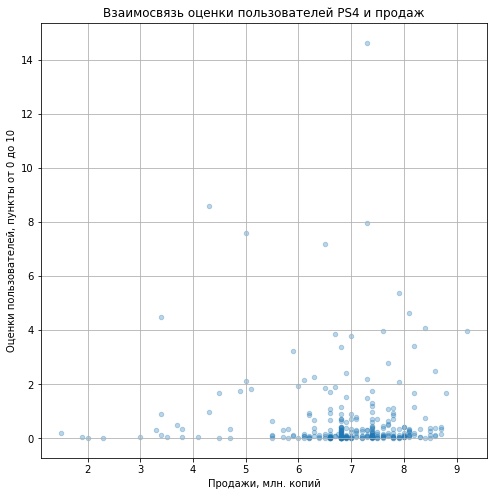

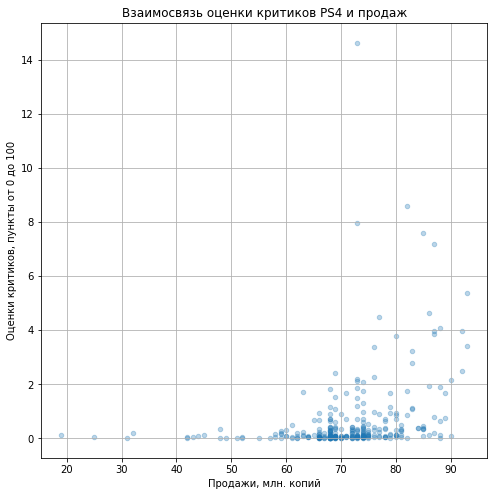

In [90]:
platform_score_influence(current_data, 'PS4')

**Xbox One**

Корреляция  продаж и оценок пользователей Xbox One : -0.024955975491916627
Корреляция продаж и оценок критиков Xbox One : 0.35993673318954433


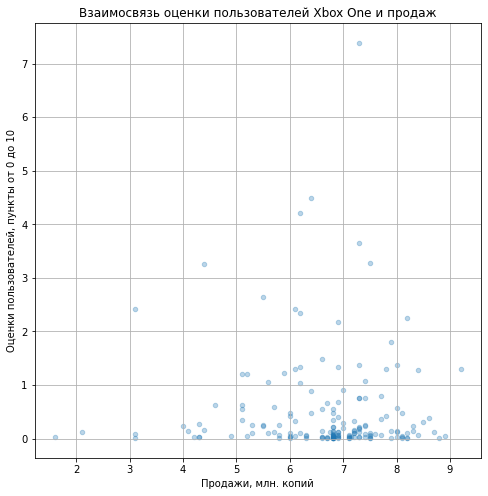

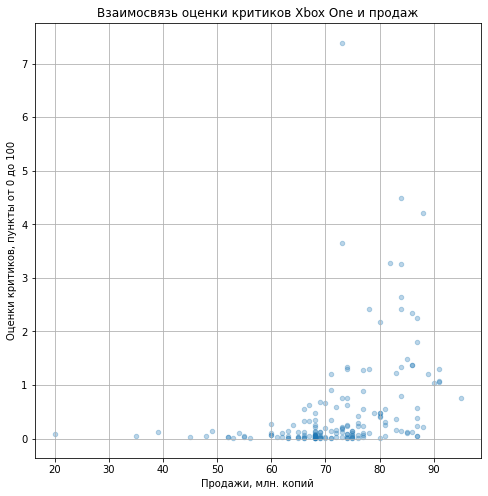

In [91]:
platform_score_influence(current_data, 'Xbox One')

**Промежуточные выводы:**

Просмотрев соотношение отзывов покупателе и критиков можно сказать, что большую часть составляют высокие оценки. Мы выяснили, что по данным из диаграмм рассеивания у обоих лидеров PS4 и Xbox One:
- слабо отрицательная корреляция продаж c отзывами покупателей;
- слабо положительная корреляция продаж c отзывами критиков.

**Посмотрим, как влияют на продажи внутри других платформ отзывы пользователей и критиков.**

Соотнесите выводы с продажами игр на других платформах.

In [92]:
# воспользуемся переменной data со всеми платформами
platforms_sales = data.groupby('platform')['total_sales'].describe()
platforms_sales

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
Atari 2600,133.0,0.729173,0.917799,0.07,0.3000,0.460,0.7800,7.81
Dendy Classic,52.0,0.306731,0.468660,0.02,0.0775,0.135,0.2975,2.41
GB-60,98.0,2.606735,5.365478,0.06,0.3025,1.165,2.1650,31.38
Game Boy Advance,822.0,0.386679,0.896897,0.01,0.0525,0.160,0.3900,15.84
Game Gear,1.0,0.040000,NaN,0.04,0.0400,0.040,0.0400,0.04
NEC PC-FX,1.0,0.030000,NaN,0.03,0.0300,0.030,0.0300,0.03
NEC TurboGrafx,2.0,0.080000,0.084853,0.02,0.0500,0.080,0.1100,0.14
NG,12.0,0.120000,0.082241,0.02,0.0550,0.100,0.2000,0.25
Nintendo 3DS,520.0,0.498077,1.430876,0.01,0.0500,0.120,0.3300,14.60


#### Жанры

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Для начала сделаем анализ жанров со всех платформ по всем годам, чтобы посмотреть какие жанры были успешны за все время.

И последнее, что мы сделаем в анализе данных, это сравним показатели по жанрам и выясним отличаются топовые жанры нашей выборки от топовых жанров всех платформ.

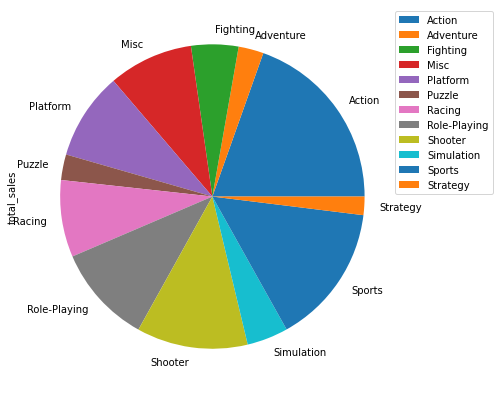

In [93]:
# посмотрим популярность жанров на всех платформах за все время
(
    data.pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .plot.pie(y='total_sales', figsize=(25,7))
)
plt.legend(bbox_to_anchor=(1.25, 1.0))

Text(0, 0.5, 'Количество прдаж, млг. копий')

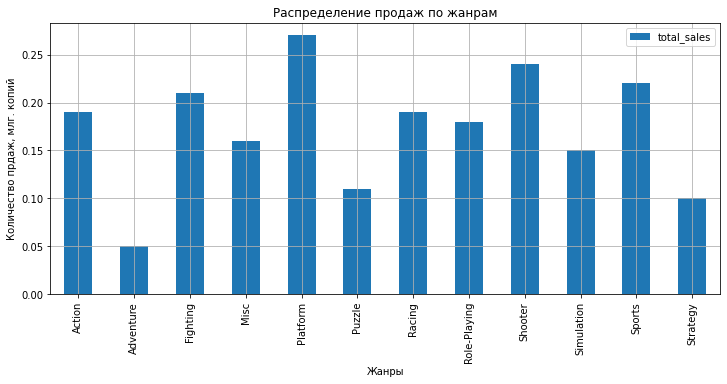

In [94]:
(
data.pivot_table(index='genre', values='total_sales', aggfunc='median')
.plot(grid=True, figsize=(12, 5), kind = 'bar')
)
plt.title("Распределение продаж по жанрам")
plt.xlabel("Жанры")
plt.ylabel("Количество прдаж, млг. копий")

В круговой диаграмме мы можем выделить ТОП-5 жанров:

1. Platform
2. Shooter
3. Sports
4. Fighting
5. Action

ТОП-5 самых непопулярных жанров:

1. Adventure
2. Puzzle
3. Strategy
4. Simulation
5. Misc

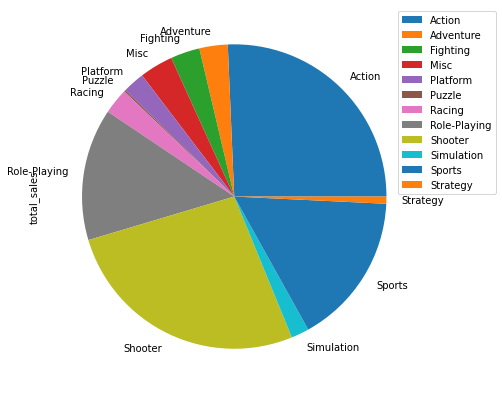

In [95]:
# посмотрим популярность жанров на всех платформах за все время
(
    current_data.pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .plot.pie(y='total_sales', figsize=(25,7))
)
plt.legend(bbox_to_anchor=(1.2, 1.0))

<AxesSubplot:xlabel='genre'>

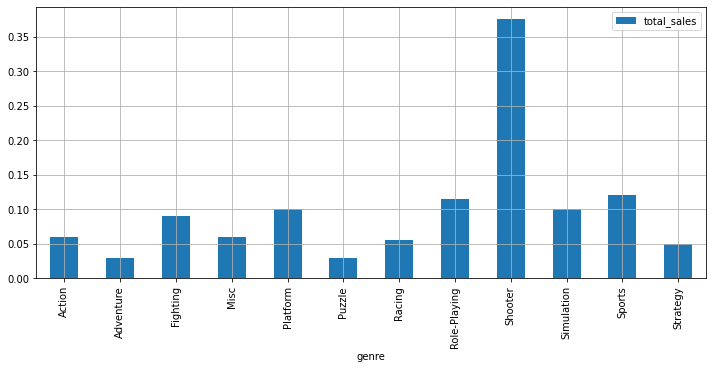

In [96]:
(
current_data.pivot_table(index='genre', values='total_sales', aggfunc='median')
.plot(grid=True, figsize=(12, 5), kind = 'bar')
)

В круговой диаграмме мы можем выделить ТОП-5 жанров:

1. Shooter
2. Sports
3. Role-Playing
4. Simulation
5. Platform

ТОП-5 самых непопулярных жанров:

1. Adventure
2. Puzzle
3. Strategy
4. Racing
5. Misc / Action

**Выврды:**
- **Изменение в топ-5 популярных жанров**. Жанры Sports и Shooter стабильно входят в тройку лидеров, как в общей выборке, так и в выборке за период 2015-2016 гг. Постепенно в тройку лидеров вошёл жанр Role-Playing, заменив Platform, который опустился на пятое место. Четвёрное место разнется (в нашей выборке это Simulation), а в общей его занимает Fighting. Пятое место Action уступил, как было сказано, Platform.

- **Изменение в топ-5 непопулярных жанров**.ТОП-5 самых непопулярных жанров содержит одинаковые жанры, что в общей выборке, что в нашей. Adventure, Puzzle и Strategy - это стабильно самые непопулярные жанры. В 2014-2016 гг. к ним присоединились Racing, заменившие Simulation. В зоне выхода из нижней лиги соревнуются Action и Misc.

**Общий вывод исследовательского анализа.**

**Год выпуска.** Посчитав количество проданных игр с группировкой на года и платформы, мы выяснили, что наибольшее количество игр продавалось в 2008-2009 гг.Более широко - это период с 2006 по 2016 года. Он позволяет смотреть, какие платформы в принципе будут продаваться. Если сделать период меньше, то часть данных будет урезана.

**Продажи по платформам.**. Продажи по платформам менялись менялись крайне динамично. Платформами с наибольшими суммарными продажами оказались `PS4` и `Xbox One`. Распределения по годам показали, что характерный срок появляются новых и исчезают старые платформы состаляет около 1-3 года. В среднем столько же и существуют на рынке большинство платформ, за исключение нескольких долгожителей.

**Актуальный период.**. Далее нам необходимо определить актуальные период, для того чтобы спрогнозировать последующие продажи. Период с 2015 по 2016 года был установлен исходят из актуальной диагностики в игровой индустрии.

**Лидеры продаж.** Далее мы посчитаем суммарное количество продаж по каждой платформе в рамках выше указанных годов. По изучению суммарных показателей мы можем выделить самые продаваемые платформы с продажами 40 млн и более. У нас вышли следующие платформы (PS4 и Xbox One). Корректируем нашу выгрузку и оставляем в ней только эти позиции. Можно выделить лидирующуе платформы -  `PS4` и `Xbox One`.

**«Ящик с усами» по глобальным продажам.** Можем выделить несколько платформ-лидеров: PS и PS4 и Xbox One. Продажи этих платформ высокие, но при всем при этом медиана у всех платформ, кроме PS и PS3, не выходит за рамки 0.5 млн продаж, т.к. медиана и размах примерно на одном уровне. Можно сказать, что у платформ-лидеров, в отличии от тех, которые не попали в выборку есть намного больше игр-хитов, которые покупались намного чаще. Это можно объяснить тем, что каждая из платформ выборки была усовершенствована.
Остальные приставки, или остались те ми же по функционалу, или просто усовершенственной версией самих себя. Такие раритетные платформы, как Dendy Classic или Game Boy Advance не были доступны всем сегментам покупателей, а играют в них через эмуляторы.

**Продажи и оценки.** Просмотрев соотношение отзывов покупателе и критиков можно сказать, что большую часть составляют высокие оценки. Мы выяснили, что по данным из диаграмм рассеивания у обоих лидеров PS4 и Xbox One:
- слабо отрицательная корреляция продаж c отзывами покупателей;
- слабо положительная корреляция продаж c отзывами критиков.

**Жанры** Анализ жанор в игровой индусирии показал:

- **Изменение в топ-5 популярных жанров**. Жанры Sports и Shooter стабильно входят в тройку лидеров, как в общей выборке, так и в выборке за период 2015-2016 гг. Постепенно в тройку лидеров вошёл жанр Role-Playing, заменив Platform, который опустился на пятое место. Четвёрное место разнется (в нашей выборке это Simulation), а в общей его занимает Fighting. Пятое место Action уступил, как было сказано, Platform.

- **Изменение в топ-5 непопулярных жанров**.ТОП-5 самых непопулярных жанров содержит одинаковые жанры, что в общей выборке, что в нашей. Adventure, Puzzle и Strategy - это стабильно самые непопулярные жанры. В 2014-2016 гг. к ним присоединились Racing, заменившие Simulation. В зоне выхода из нижней лиги соревнуются Action и Misc.

## Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [97]:
regions = {
    'na_sales': 'Северной Америке',
    'eu_sales': 'Европе',
    'jp_sales': 'Японии',
    'other_sales': 'других странах'
}

types = {
    'platform': 'платформ',
    'genre': 'жанров',
    'rating': 'рейтингов'
}

def region_portret1(data, t, region):
    # ТОП-5 самых популярных платформ в регионе по общей таблице
    # группируем по платформе
    platform_region = data.groupby(t)[region].sum().sort_values(ascending=False).head(5)
    # построим гистограмму
    platform_region.plot(x = t, y = region, kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных ' + types[t] + ' в '+ regions[region])
    # меняем наименование горизонтальной линии ('X')
    plt.xlabel = 'Платформа'
    # меняем наименование вертикальной линии ('Y')
    plt.ylabel = 'Продажи экземпляров (млн.)'

def region_portret2(data, t, region):
    # ТОП-5 самых популярных платформ в Северной Америке по нашей таблице
    # группируем по платформе
    platform_region = data.groupby(t)[region].sum().sort_values(ascending=False).head(5)
    # построим гистограмму
    platform_region.plot(x = t, y = region, kind = 'bar', figsize=(20,8), grid=True, title = 'ТОП-5 самых популярных ' + types[t] + ' в ' + regions[region] + 'по нашей таблице')
    # меняем наименование горизонтальной линии ('X')
    plt.xlabel = 'Платформа'
    # меняем наименование вертикальной линии ('Y')
    plt.ylabel = 'Продажи экземпляров (млн.)'
    
def region_portret3(data, t, region):
    # считаем долю продаж в Северной Америке по нашей таблице
    # переменной platform_count_full присваиваем сумму общих продаж по всем платформам
    # platform_count_full = data.groupby(t)['total_sales'].sum().sum()
    platform_count_full = data.groupby(t)[region].sum().sum()
    platform_region = data.groupby(t)[region].sum()
    
    # вычисляем процентное соотношение
    percent_platform_region = platform_region / platform_count_full * 100
    display('Доля продаж в ' + regions[region] + ':')
    display(percent_platform_region.sort_values(ascending=False).head(5))

Построим для каждого региона соответсвующие графики и списки.

**ТОП-5 самых популярных платформ в Северной Америке**

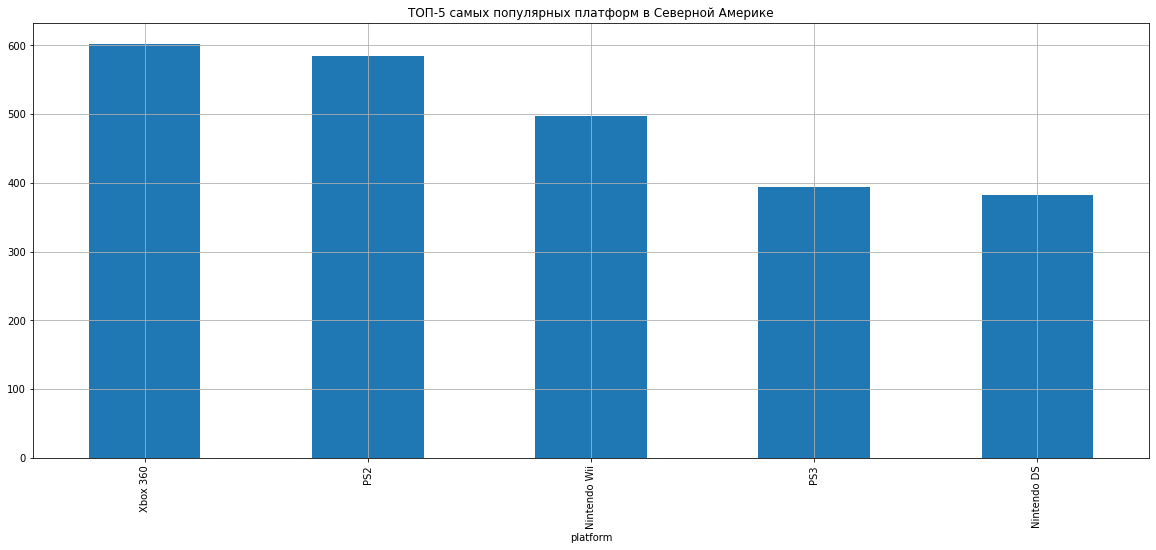

In [98]:
region_portret1(data, 'platform', 'na_sales')

Общая выборка носит ознакомительный характер.

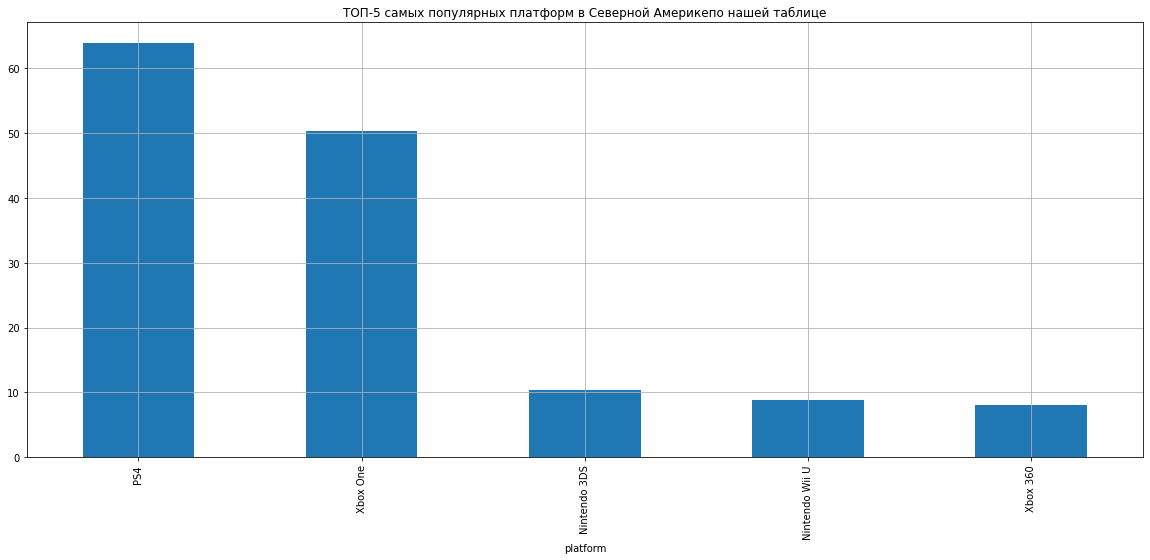

In [99]:
region_portret2(current_data, 'platform', 'na_sales')

In [100]:
region_portret3(current_data, 'platform', 'na_sales')

'Доля продаж в Северной Америке:'

platform
PS4               42.068511
Xbox One          33.135705
Nintendo 3DS       6.791831
Nintendo Wii U     5.836627
Xbox 360           5.309618
Name: na_sales, dtype: float64

Мы взяли данные для анализа за 2015-2016 года. ТОП-5 самых популярных платформ в Северной Америке по нашей таблице получился такой: - 
1. PS4               16.043211
2. Xbox One          12.636603
3. Nintendo 3DS       2.590127
4. Nintendo Wii U     2.225851
5. Xbox 360           2.024871

**ТОП-5 самых популярных жанров в Северной Америке**

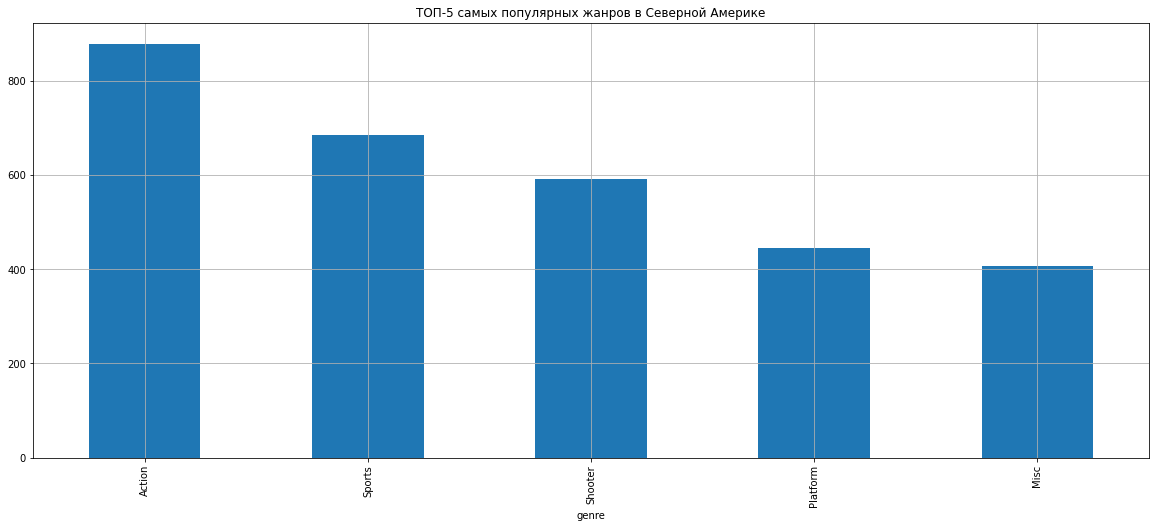

In [101]:
region_portret1(data, 'genre', 'na_sales')

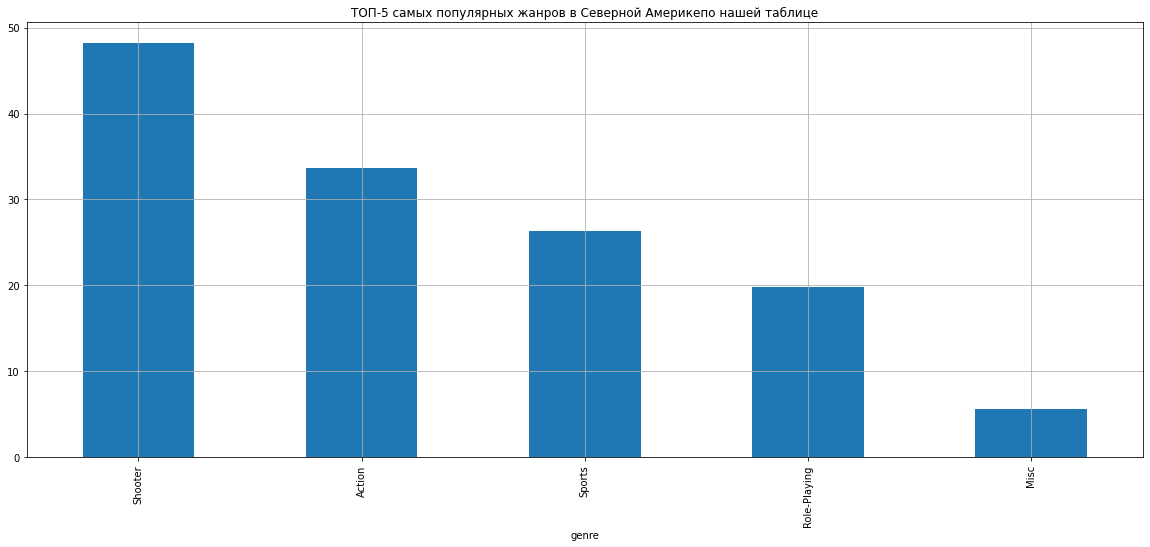

In [102]:
region_portret2(current_data, 'genre', 'na_sales')

In [103]:
region_portret3(current_data, 'genre', 'na_sales')

'Доля продаж в Северной Америке:'

genre
Shooter         31.745718
Action          22.187088
Sports          17.332016
Role-Playing    13.056653
Misc             3.675889
Name: na_sales, dtype: float64

**ТОП-5 самых популярных рейтингов в Северной Америке**

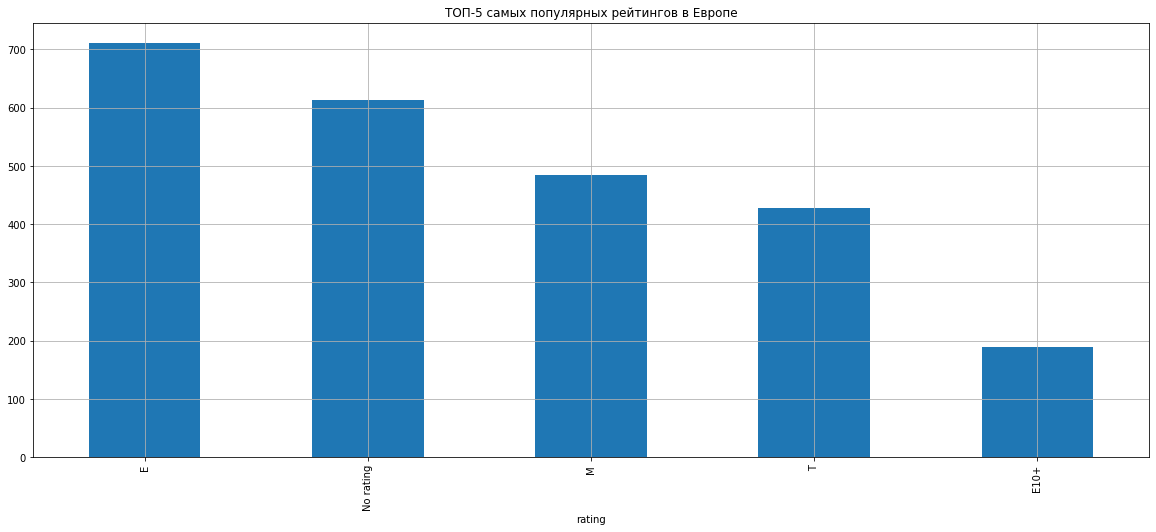

In [104]:
region_portret1(data, 'rating', 'eu_sales')

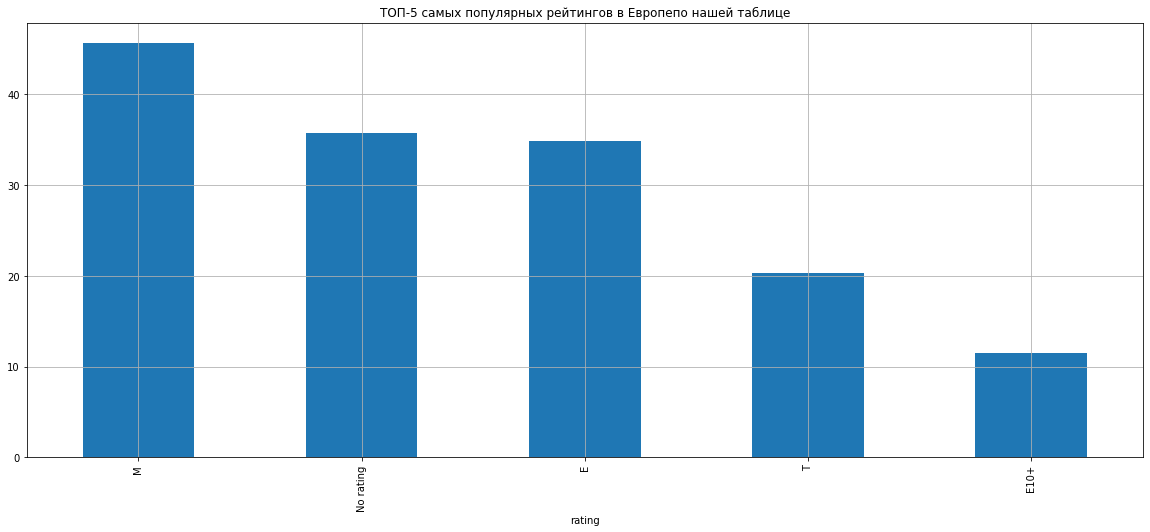

In [105]:
region_portret2(current_data, 'rating', 'eu_sales')

In [106]:
region_portret3(current_data, 'rating', 'eu_sales')

'Доля продаж в Европе:'

rating
M            30.807160
No rating    24.120230
E            23.525836
T            13.725093
E10+          7.794664
Name: eu_sales, dtype: float64

**ТОП-5 самых популярных платформ в Европее**

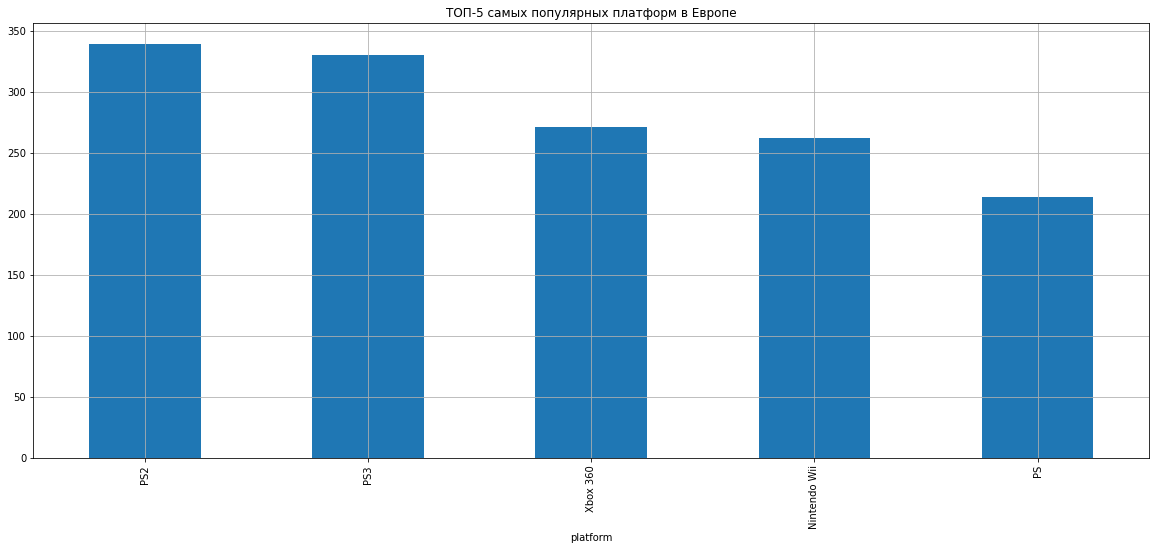

In [107]:
region_portret1(data, 'platform', 'eu_sales')

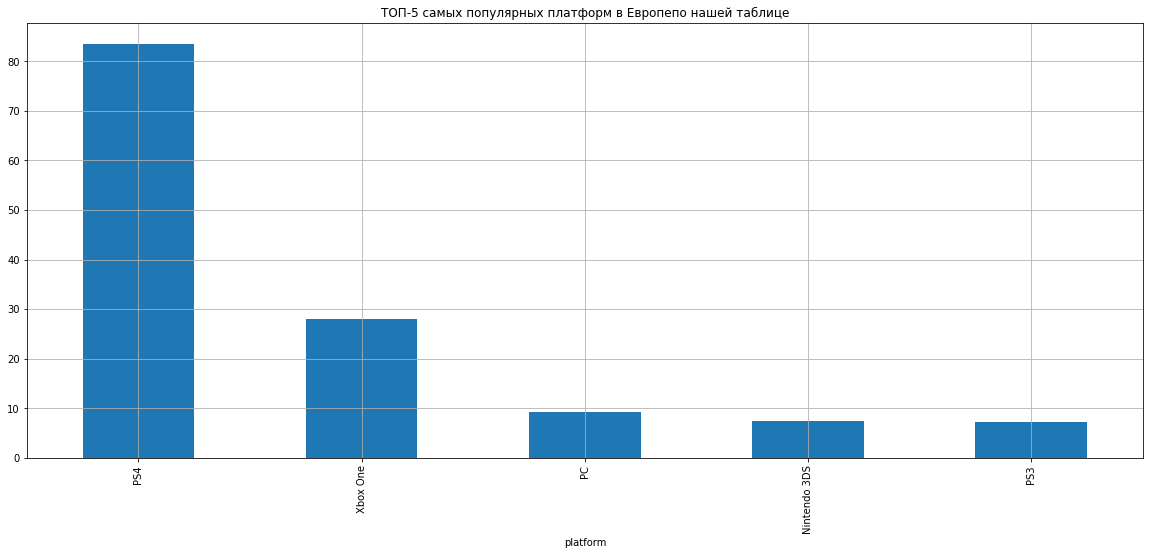

In [108]:
region_portret2(current_data, 'platform', 'eu_sales')

In [109]:
region_portret3(current_data, 'platform', 'eu_sales')

'Доля продаж в Европе:'

platform
PS4             56.426883
Xbox One        18.980074
PC               6.220871
Nintendo 3DS     4.991557
PS3              4.930767
Name: eu_sales, dtype: float64

Мы взяли данные для анализа за 2015-2016 года. ТОП-5 самых популярных платформ в Северной Америке по нашей таблице получился такой: - 
1. PS4             20.987313
2. Xbox One         7.059415
3. PC               2.313780
4. Nintendo 3DS     1.856551
5. PS3              1.833940

**ТОП-5 самых популярных жанров в Европее**

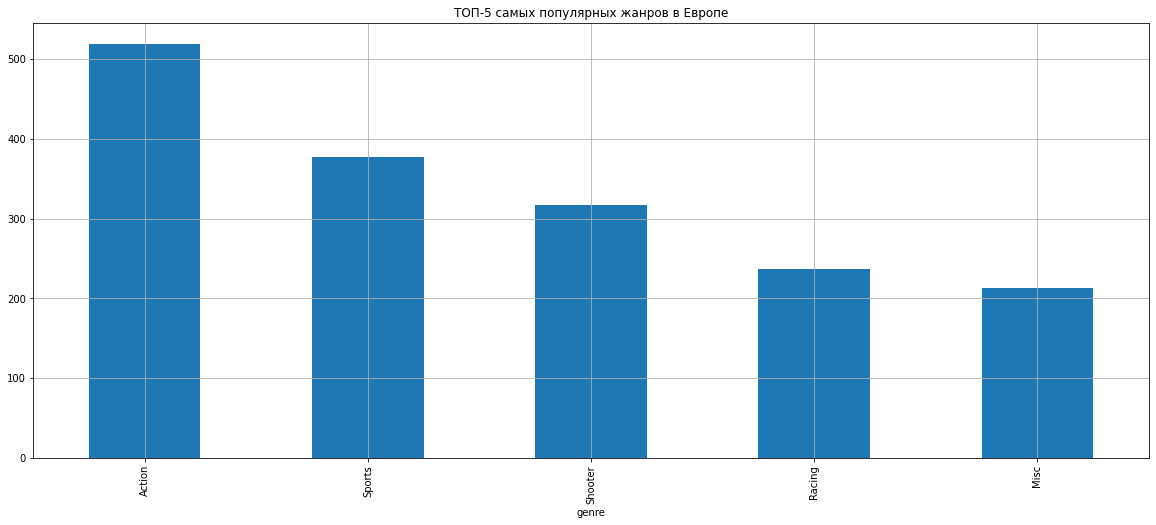

In [110]:
region_portret1(data, 'genre', 'eu_sales')

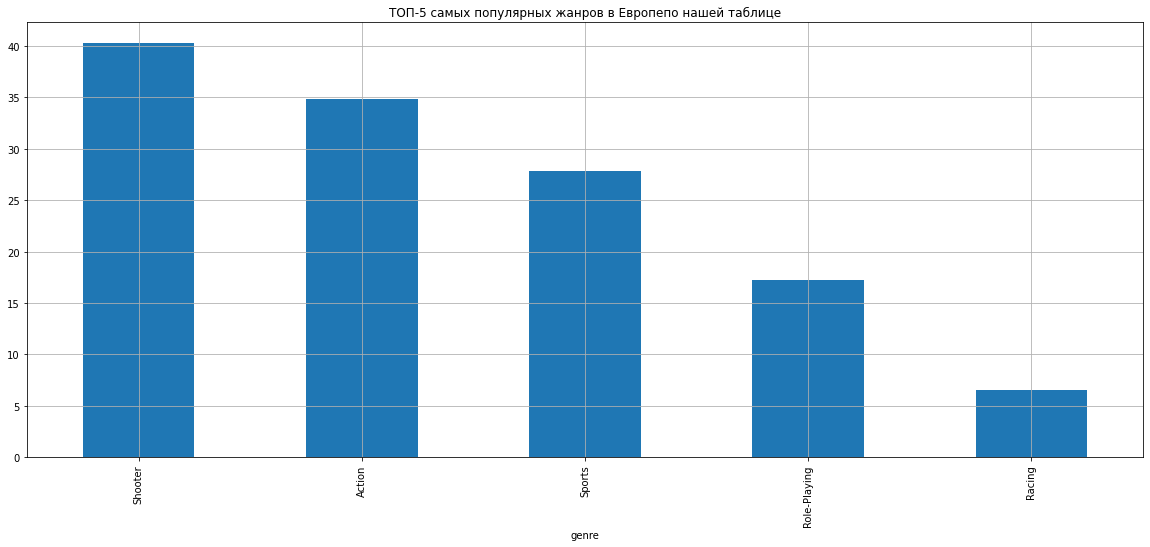

In [111]:
region_portret2(current_data, 'genre', 'eu_sales')

In [112]:
region_portret3(current_data, 'genre', 'eu_sales')

'Доля продаж в Европе:'

genre
Shooter         27.207025
Action          23.566363
Sports          18.790949
Role-Playing    11.624451
Racing           4.403918
Name: eu_sales, dtype: float64

**Портреты по всем странам**

In [113]:
# расположим по странам
for r in regions:
    for t in types:
        region_portret3(current_data, t, r)

'Доля продаж в Северной Америке:'

platform
PS4               42.068511
Xbox One          33.135705
Nintendo 3DS       6.791831
Nintendo Wii U     5.836627
Xbox 360           5.309618
Name: na_sales, dtype: float64

'Доля продаж в Северной Америке:'

genre
Shooter         31.745718
Action          22.187088
Sports          17.332016
Role-Playing    13.056653
Misc             3.675889
Name: na_sales, dtype: float64

'Доля продаж в Северной Америке:'

rating
M            30.988142
No rating    24.664032
E            17.516469
T            15.059289
E10+         11.772069
Name: na_sales, dtype: float64

'Доля продаж в Европе:'

platform
PS4             56.426883
Xbox One        18.980074
PC               6.220871
Nintendo 3DS     4.991557
PS3              4.930767
Name: eu_sales, dtype: float64

'Доля продаж в Европе:'

genre
Shooter         27.207025
Action          23.566363
Sports          18.790949
Role-Playing    11.624451
Racing           4.403918
Name: eu_sales, dtype: float64

'Доля продаж в Европе:'

rating
M            30.807160
No rating    24.120230
E            23.525836
T            13.725093
E10+          7.794664
Name: eu_sales, dtype: float64

'Доля продаж в Японии:'

platform
Nintendo 3DS      44.101124
PS4               22.565543
PS Vita           15.749064
PS3                9.307116
Nintendo Wii U     7.715356
Name: jp_sales, dtype: float64

'Доля продаж в Японии:'

genre
Action          43.164794
Role-Playing    25.112360
Shooter          7.097378
Misc             5.973783
Adventure        4.157303
Name: jp_sales, dtype: float64

'Доля продаж в Японии:'

rating
No rating    61.591760
T            14.419476
E             9.831461
M             8.033708
E10+          6.123596
Name: jp_sales, dtype: float64

'Доля продаж в других странах:'

platform
PS4               64.062500
Xbox One          17.209821
PS3                5.558036
Nintendo 3DS       3.727679
Nintendo Wii U     3.303571
Name: other_sales, dtype: float64

'Доля продаж в других странах:'

genre
Shooter         30.089286
Action          23.638393
Sports          19.084821
Role-Playing    12.008929
Fighting         3.504464
Name: other_sales, dtype: float64

'Доля продаж в других странах:'

rating
M            31.808036
No rating    24.843750
E            19.129464
T            15.290179
E10+          8.928571
Name: other_sales, dtype: float64

In [114]:
# расположим по типам данных
for t in types:
    for r in regions:
        region_portret3(current_data, t, r)

'Доля продаж в Северной Америке:'

platform
PS4               42.068511
Xbox One          33.135705
Nintendo 3DS       6.791831
Nintendo Wii U     5.836627
Xbox 360           5.309618
Name: na_sales, dtype: float64

'Доля продаж в Европе:'

platform
PS4             56.426883
Xbox One        18.980074
PC               6.220871
Nintendo 3DS     4.991557
PS3              4.930767
Name: eu_sales, dtype: float64

'Доля продаж в Японии:'

platform
Nintendo 3DS      44.101124
PS4               22.565543
PS Vita           15.749064
PS3                9.307116
Nintendo Wii U     7.715356
Name: jp_sales, dtype: float64

'Доля продаж в других странах:'

platform
PS4               64.062500
Xbox One          17.209821
PS3                5.558036
Nintendo 3DS       3.727679
Nintendo Wii U     3.303571
Name: other_sales, dtype: float64

'Доля продаж в Северной Америке:'

genre
Shooter         31.745718
Action          22.187088
Sports          17.332016
Role-Playing    13.056653
Misc             3.675889
Name: na_sales, dtype: float64

'Доля продаж в Европе:'

genre
Shooter         27.207025
Action          23.566363
Sports          18.790949
Role-Playing    11.624451
Racing           4.403918
Name: eu_sales, dtype: float64

'Доля продаж в Японии:'

genre
Action          43.164794
Role-Playing    25.112360
Shooter          7.097378
Misc             5.973783
Adventure        4.157303
Name: jp_sales, dtype: float64

'Доля продаж в других странах:'

genre
Shooter         30.089286
Action          23.638393
Sports          19.084821
Role-Playing    12.008929
Fighting         3.504464
Name: other_sales, dtype: float64

'Доля продаж в Северной Америке:'

rating
M            30.988142
No rating    24.664032
E            17.516469
T            15.059289
E10+         11.772069
Name: na_sales, dtype: float64

'Доля продаж в Европе:'

rating
M            30.807160
No rating    24.120230
E            23.525836
T            13.725093
E10+          7.794664
Name: eu_sales, dtype: float64

'Доля продаж в Японии:'

rating
No rating    61.591760
T            14.419476
E             9.831461
M             8.033708
E10+          6.123596
Name: jp_sales, dtype: float64

'Доля продаж в других странах:'

rating
M            31.808036
No rating    24.843750
E            19.129464
T            15.290179
E10+          8.928571
Name: other_sales, dtype: float64

#### **Портреты регионов**

По известным нам данным можно составить следующие портреты регионоа:

- **Северная Америка:**. 
    - ***Платформы.*** Самые популярные платформы в Северной Америке - это *PS4* (`42%`) и *Xbox One* (`33%`). *Nintendo 3DS* имеет `6.8%`, а *Nintendo Wii U* и *Xbox 360* примерно `6%` и `5%` соответственно.
    - ***Жанры.*** Наиболее популярным жанром в Северной Америке является шутер (`31.7%`). Затем следует экшн (`22.1%`). Спортивные игры занимают треитье место (`17.33%`). Ролевые игры составляют `13.0%` рынка Северной Америки в 2015-2016 годах. `3.67%` составляют игры Misc, т.е. без ярко выраженной жанровой принаджлежности.    
    - ***Рейтинги.*** Самый расространённый в Северной Америке рейтмен - «М» (`31%`), соответствеющий категории «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.. Далее по популярности идут игры без рейтинга (`24.6%`)  «E» («Everyone») — «Для всех» - (`17.5%`) и «T» («Teen») — «Подросткам» - (`15%`). `12%` у игр для маленьких детей от 10 лет («E10+»).    
    - ***Портрет:*** в Северной Америке в 2015-2016 гг. популярны шутеры с рейтингом «Для взрослых» на платформе *PS4*.

- **Европа:** 
    - ***Платформы.*** Самые популярные платформы в Европе - это *PS4* (`56.4%`) и *Xbox One* (`19%`). *PC* имеет `6%`, а *Nintendo 3DS* и *PS3* примерно по `5%`.    
    - ***Жанры.*** Наиболее популярным жанром в Европе является шутер (`27.2%`). Затем следует экшн (`23.6%`). Спортивные игры занимают треитье место (`18.8%`). Ролевые игры составляют ` 11.6%` рынка. `4.4%` составляют гоночные симуляторы.    
    - ***Рейтинги.*** Самый расространённый в Европе рейтинг - «М» (`31%`), соответствеющий категории «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Далее по популярности идут игры без рейтинга (`24%`). «E» («Everyone») — «Для всех» - (`23.5%`) и «T» («Teen») — «Подросткам» - (`13.7%`). У игр для маленьких детей от 10 лет («E10+») - `8%`.
    - ***Портрет:*** в Европе в 2015-2016 гг. популярны шутеры с рейтингом «Для взрослых» на платформе *PS4*.

- **Япония:**
    - ***Платформы.*** Самые популярные платформы в Японии - это *Nintendo 3DS* (`44.1%`) и *PS4* (`22.6%`). *PS Vita* имеет `15.74%`, а *PS3* - `9.3%`, *Nintendo Wii U* примерно по `7.7%`.    
    - ***Жанры.*** Наиболее популярным жанром в Японии является экшен (`43.16%`). Затем следует ролевые игры (`25%`). Шутеры занимают треитье место (`7%`). Ролевые игры составляют ` 6%` рынка Японии. `4%` составляют адвенчюры.
    - ***Рейтинги.*** В Японии большая часть игр не имеет рейтинга (`61.6%`). Делее идут игры с рейтингом «T» («Teen») — «Подросткам» - (`14.41%`). Далее по популярности идут игры «E» («Everyone») — «Для всех» - (`9.8%`) и игры с рейтингом  для взрослых «М»  составляют `8%`. У игр для маленьких детей от 10 лет («E10+») - `6.12%`.  
    - ***Портрет:*** в Японии в 2015-2016 гг. популярны экшены без рейтинга на платформе *Nintendo 3DS*.

- **Другие страны:**
    - ***Платформы.*** Самые популярные платформы в других странах - это *PS4* (`64%`) и *PS4* (`17%`). *PS3* имеет `5.6%`, а *Nintendo 3DS* - `3.7%`, *Nintendo Wii U* - `3.3%`.
    - ***Жанры.*** Наиболее популярным жанром в других странах является шутер (`30%`). Затем следует экшен с (`23.6%`). Спортивные игры занимают треитье место (`19%`). Ролевые игры составляют ` 12%` рынка других стран. `3.5%` составляют файтинги.
    - ***Рейтинги.*** Самый расространённый в других странах рейтинг - «М» (`32%`), соответствеющий категории «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Далее по популярности идут игры без рейтинга (`25%`). Иры с рейтингом «E» («Everyone») — «Для всех» - `19.12%`. Игры категории «T» («Teen») — «Подросткам» - (`15.3%`). У игр для маленьких детей от 10 лет («E10+») - `9.%`.
    - ***Портрет:*** в других странах в 2015-2016 гг. популярны экшены с рейтингом «Для взрослых» на платформе *PS4*.

Если разделить по анализируемым странам, то мы получим:

**Самые популярные платформы:**
- ***Северная Америка*** - PS4;
- ***Европа*** - PS4;
- ***Япония*** - Nintendo 3DS;
- ***Другие странв*** - PS4.

**Самый поулярный жанр:**
- ***Северная Америка*** - шутер;
- ***Европа*** - шутер;
- ***Япония*** - экшен;
- ***Другие странв*** - шутер.

**Самый поулярный рейтинг:**
- ***Северная Америка*** -  «М» - «Для взрослых»;
- ***Европа*** -  «М» - «Для взрослых»;
- ***Япония*** -  без рейтинга;
- ***Другие странв*** -  «М» - «Для взрослых».

## Проверьте гипотезы

Задайте самостоятельно пороговое значение alpha.
Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

Нам нужно сравним средние значения двух генеральных совокупночтей мы должны использовать критерий Стьюдента.

Для выбора t-testa необходимо три условия:
    
- Генеральные совокупности не должны зависеть друг от друга.
- Выборочные средние должны быть нормально распределены.
- Дисперсии рассматриваемых генеральных совокупностей должны быть равны.

Проверим эти условия для обеих задач.

В финальной части нам необходимо проверить две гипотезы:

- cредние пользовательские рейтинги платформ Xbox One и PC одинаковые
- cредние пользовательские рейтинги жанров Action и Sports разные

Так как платформы Xbox One и PC не попали в нашу выборку в связи с тем, что суммарные продажи менее 300 млн. Сделаем выгрузку из общей таблицы и по ней рассчитаем среднее значение по глобальным продажам.

#### Xbox One и PC

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Для проверки гипотезы "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" в качестве нулевой и альтернативной гипотезы мы взяли следующее:
- H0: средние рейтинги по платформам одинаковые
- H1: средние рейтинги по платформам разные

Поскольку рассматриваются оценки двух платформ за один и тот же период, то, генеральные независимы друг от друга.

In [115]:
# обозначили две выборки конкретных столбцов с пользовательскими рейтингами.
xbox_1 = data[data['platform'] == 'Xbox One']['user_score']
pc_1 = data[data['platform'] == 'PC']['user_score']

Посмотрим на распределения выборок.

<AxesSubplot:>

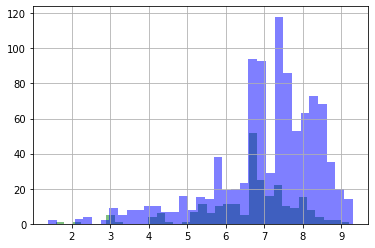

In [116]:
# визуализируем распределения
xbox_1.hist(bins=35, alpha=0.5, color='green')
pc_1.hist(bins=35, alpha=0.5, color='blue')

Видно, что выборочные средние нормально распределены.

In [117]:
print('Дисперсия Xbox One', xbox_1.std())
print('Дисперсия PC', pc_1.std())

Дисперсия Xbox One 1.2076735673101209
Дисперсия PC 1.3677737973800683


Дисперсии сопоставимы. 

Следовательно, можем испозьзовать t-тест.

In [118]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(xbox_1, pc_1)

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

p-значение: 6.567778511745062e-06
Отвергаем нулевую гипотезу.


Результат говорит о том, что нулевая гипотеза отвергается.

**Вывод:** средние рейтинги по платформам Xbox One и PC разные.

#### Action и Sports

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Рейтинг жанров мы уже будем делать по нашей выборке

Для проверки гипотезы "средние пользовательские рейтинги жанров Action и Sports разные" в качестве нулевой и альтернативной гипотезы мы взяли следующее:
- H0: средние рейтинги по жанрам одинаковые
- H1: средние рейтинги по жанрам разные

Поскольку рассматриваются оценки двух жанров за один и тот же период, то, генеральные независимы друг от друга.

In [119]:
# обозначили две выборки конкретных столбцов с пользовательскими рейтингами.
action_1 = data[data['genre'] == 'Action']['user_score']
sports_1 = data[data['genre'] == 'Sports']['user_score']

Посмотрим на распределения выборок.

<AxesSubplot:>

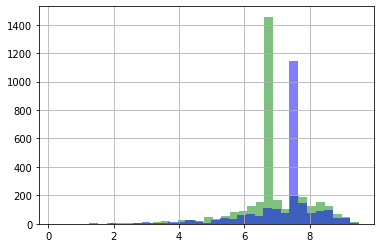

In [120]:
action_1.hist(bins=35, alpha=0.5, color='green')
sports_1.hist(bins=35, alpha=0.5, color='blue')

In [121]:
print('Дисперсия Action', action_1.std())
print('Дисперсия Sports', sports_1.std())

Дисперсия Action 1.0760973355335188
Дисперсия Sports 1.1544107928855052


Дисперсии сопоставимы. 

Следовательно, можем испозьзовать t-тест.

In [122]:
alpha = .05 # критический уровень статистической значимости

# если p-value окажется меньше него - отвегнем гипотезу
results = st.ttest_ind(action_1,sports_1)

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

p-значение:  2.0990664340457514e-21
Отвергаем нулевую гипотезу.


Результат говорит о том, что нулевая гипотеза отвергается.

**Вывод:** средние рейтинги жанров Action и Sports не одинаковые.

## Общий вывод

### Подготовка данные

**Пропуски.** Работа с пропусками в данных позволяет восполнить значительную часть пробнлов.

**Изменение типов данных.** Изменение некоторых типов данных с вещественных на целые облегчит понимание, анализ и интерпретацию данных.

**Обработка дубликатов.** Дубликатов не обнаружено.

**Обработка редких значений и аномалий.** Аномалий нет.

**Добавление новых столбцов.** Мы добавили необходимое значение. Добавление новых столбцов позволяет категоризировать данные и расширить их потенциал. Это помогает улучшить анализ.

### Проведите исследовательский анализ данных

**Год выпуска.** Посчитав количество проданных игр с группировкой на года и платформы, мы выяснили, что наибольшее количество игр продавалось в 2008-2009 гг.Более широко - это период с 2006 по 2016 года. Он позволяет смотреть, какие платформы в принципе будут продаваться. Если сделать период меньше, то часть данных будет урезана.

**Продажи по платформам.**. Продажи по платформам менялись менялись крайне динамично. Платформами с наибольшими суммарными продажами оказались `PS4` и `Xbox One`. Распределения по годам показали, что характерный срок появляются новых и исчезают старые платформы состаляет около 1-3 года. В среднем столько же и существуют на рынке большинство платформ, за исключение нескольких долгожителей.

**Актуальный период.**. Далее нам необходимо определить актуальные период, для того чтобы спрогнозировать последующие продажи. Период с 2015 по 2016 года был установлен исходят из актуальной диагностики в игровой индустрии.

**Лидеры продаж.** Далее мы посчитаем суммарное количество продаж по каждой платформе в рамках выше указанных годов. По изучению суммарных показателей мы можем выделить самые продаваемые платформы с продажами 40 млн и более. У нас вышли следующие платформы (PS4 и Xbox One). Корректируем нашу выгрузку и оставляем в ней только эти позиции. Можно выделить лидирующуе платформы -  `PS4` и `Xbox One`.

**«Ящик с усами» по глобальным продажам.** Можем выделить несколько платформ-лидеров: PS и PS4 и Xbox One. Продажи этих платформ высокие, но при всем при этом медиана у всех платформ, кроме PS и PS3, не выходит за рамки 0.5 млн продаж, т.к. медиана и размах примерно на одном уровне. Можно сказать, что у платформ-лидеров, в отличии от тех, которые не попали в выборку есть намного больше игр-хитов, которые покупались намного чаще. Это можно объяснить тем, что каждая из платформ выборки была усовершенствована.
Остальные приставки, или остались те ми же по функционалу, или просто усовершенственной версией самих себя. Такие раритетные платформы, как Dendy Classic или Game Boy Advance не были доступны всем сегментам покупателей, а играют в них через эмуляторы.

**Продажи и оценки.** Просмотрев соотношение отзывов покупателе и критиков можно сказать, что большую часть составляют высокие оценки. Мы выяснили, что по данным из диаграмм рассеивания у обоих лидеров PS4 и Xbox One:
- слабо отрицательная корреляция продаж c отзывами покупателей;
- слабо положительная корреляция продаж c отзывами критиков.

**Жанры** Анализ жанор в игровой индусирии показал:

- **Изменение в топ-5 популярных жанров**. Жанры Sports и Shooter стабильно входят в тройку лидеров, как в общей выборке, так и в выборке за период 2015-2016 гг. Постепенно в тройку лидеров вошёл жанр Role-Playing, заменив Platform, который опустился на пятое место. Четвёрное место разнется (в нашей выборке это Simulation), а в общей его занимает Fighting. Пятое место Action уступил, как было сказано, Platform.

- **Изменение в топ-5 непопулярных жанров**.ТОП-5 самых непопулярных жанров содержит одинаковые жанры, что в общей выборке, что в нашей. Adventure, Puzzle и Strategy - это стабильно самые непопулярные жанры. В 2014-2016 гг. к ним присоединились Racing, заменившие Simulation. В зоне выхода из нижней лиги соревнуются Action и Misc.

### Портреты пользователей каждого региона

По известным нам данным можно составить следующие портреты регионоа:

- **Северная Америка:**. 
    - ***Платформы.*** Самые популярные платформы в Северной Америке - это *PS4* (`42%`) и *Xbox One* (`33%`). *Nintendo 3DS* имеет `6.8%`, а *Nintendo Wii U* и *Xbox 360* примерно `6%` и `5%` соответственно.
    - ***Жанры.*** Наиболее популярным жанром в Северной Америке является шутер (`31.7%`). Затем следует экшн (`22.1%`). Спортивные игры занимают треитье место (`17.33%`). Ролевые игры составляют `13.0%` рынка Северной Америки в 2015-2016 годах. `3.67%` составляют игры Misc, т.е. без ярко выраженной жанровой принаджлежности.    
    - ***Рейтинги.*** Самый расространённый в Северной Америке рейтмен - «М» (`31%`), соответствеющий категории «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.. Далее по популярности идут игры без рейтинга (`24.6%`)  «E» («Everyone») — «Для всех» - (`17.5%`) и «T» («Teen») — «Подросткам» - (`15%`). `12%` у игр для маленьких детей от 10 лет («E10+»).    
    - ***Портрет:*** в Северной Америке в 2015-2016 гг. популярны шутеры с рейтингом «Для взрослых» на платформе *PS4*.

- **Европа:** 
    - ***Платформы.*** Самые популярные платформы в Европе - это *PS4* (`56.4%`) и *Xbox One* (`19%`). *PC* имеет `6%`, а *Nintendo 3DS* и *PS3* примерно по `5%`.    
    - ***Жанры.*** Наиболее популярным жанром в Европе является шутер (`27.2%`). Затем следует экшн (`23.6%`). Спортивные игры занимают треитье место (`18.8%`). Ролевые игры составляют ` 11.6%` рынка. `4.4%` составляют гоночные симуляторы.    
    - ***Рейтинги.*** Самый расространённый в Европе рейтинг - «М» (`31%`), соответствеющий категории «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Далее по популярности идут игры без рейтинга (`24%`). «E» («Everyone») — «Для всех» - (`23.5%`) и «T» («Teen») — «Подросткам» - (`13.7%`). У игр для маленьких детей от 10 лет («E10+») - `8%`.
    - ***Портрет:*** в Европе в 2015-2016 гг. популярны шутеры с рейтингом «Для взрослых» на платформе *PS4*.

- **Япония:**
    - ***Платформы.*** Самые популярные платформы в Японии - это *Nintendo 3DS* (`44.1%`) и *PS4* (`22.6%`). *PS Vita* имеет `15.74%`, а *PS3* - `9.3%`, *Nintendo Wii U* примерно по `7.7%`.    
    - ***Жанры.*** Наиболее популярным жанром в Японии является экшен (`43.16%`). Затем следует ролевые игры (`25%`). Шутеры занимают треитье место (`7%`). Ролевые игры составляют ` 6%` рынка Японии. `4%` составляют адвенчюры.
    - ***Рейтинги.*** В Японии большая часть игр не имеет рейтинга (`61.6%`). Делее идут игры с рейтингом «T» («Teen») — «Подросткам» - (`14.41%`). Далее по популярности идут игры «E» («Everyone») — «Для всех» - (`9.8%`) и игры с рейтингом  для взрослых «М»  составляют `8%`. У игр для маленьких детей от 10 лет («E10+») - `6.12%`.  
    - ***Портрет:*** в Японии в 2015-2016 гг. популярны экшены без рейтинга на платформе *Nintendo 3DS*.

- **Другие страны:**
    - ***Платформы.*** Самые популярные платформы в других странах - это *PS4* (`64%`) и *PS4* (`17%`). *PS3* имеет `5.6%`, а *Nintendo 3DS* - `3.7%`, *Nintendo Wii U* - `3.3%`.
    - ***Жанры.*** Наиболее популярным жанром в других странах является шутер (`30%`). Затем следует экшен с (`23.6%`). Спортивные игры занимают треитье место (`19%`). Ролевые игры составляют ` 12%` рынка других стран. `3.5%` составляют файтинги.
    - ***Рейтинги.*** Самый расространённый в других странах рейтинг - «М» (`32%`), соответствеющий категории «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Далее по популярности идут игры без рейтинга (`25%`). Иры с рейтингом «E» («Everyone») — «Для всех» - `19.12%`. Игры категории «T» («Teen») — «Подросткам» - (`15.3%`). У игр для маленьких детей от 10 лет («E10+») - `9.%`.
    - ***Портрет:*** в других странах в 2015-2016 гг. популярны экшены с рейтингом «Для взрослых» на платформе *PS4*.

Если разделить по анализируемым странам, то мы получим:

**Самые популярные платформы:**
- ***Северная Америка*** - PS4;
- ***Европа*** - PS4;
- ***Япония*** - Nintendo 3DS;
- ***Другие странв*** - PS4.

**Самый поулярный жанр:**
- ***Северная Америка*** - шутер;
- ***Европа*** - шутер;
- ***Япония*** - экшен;
- ***Другие странв*** - шутер.

**Самый поулярный рейтинг:**
- ***Северная Америка*** -  «М» - «Для взрослых»;
- ***Европа*** -  «М» - «Для взрослых»;
- ***Япония*** -  без рейтинга;
- ***Другие странв*** -  «М» - «Для взрослых».

### Проверка гипотез

Обе гипотезы отвергнуты:
- средние рейтинги по платформам Xbox One и PC разные;
- средние рейтинги жанров Action и Sports не одинаковые.